# Here we predict whether the patient has heart disease or not

## Business Case
* Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

* People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


## Domoain Analysis

In [1]:
# importing python libraries

import pandas as pd #use for Data Cleaning and Data Analysis
import numpy as np #use for numerical function
import matplotlib.pyplot as plt #use for Data Visualization
import seaborn as sns #use for Data Visualization
import warnings #use for ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("labels.csv")  #use for load the Dataset 
data

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [5]:
data1 = pd.read_csv("values.csv") #use for load the Dataset 
data1

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [7]:
data2 = pd.concat([data1,data],axis=1)  #merge the two Datasets
data2

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,5qfar3,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,2s2b1f,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,nsd00i,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0xw93k,0


## Atribute Information

- Age = Patient's age.
- Sex = Gender of the patient.
- Chest Pain Type = Categorized type of chest pain experienced.
- Slope of peak exercise st segment = Slope during peak exercise relates to the heart's electrical activity.
- Thal = Thalassemia used in heart studies.
- Resting Blood Pressure = Blood pressure measured at rest
- Num major vessels = Count of major blood vessels colored by fluoroscopy.
- Fasting Blood sugar > 120 mg/dl =  Indicates diabetes risk.
- Resting ekg results = Results from resting electrocardiogram.
- Serum cholesterol mg/dl = Cholesterol levels in the blood.
- Oldpeak eq st depression = ST depression induced by exercise.
- Max heart rate achieved = Highest heart rate during exercise.
- Exercise induced angina = Presence of angina during exercise.
- Heart disease present = Outcome variable indicating presence of heart disease.

## Basic Check

In [11]:
data2.head() #showning the top 5 data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


In [13]:
data2.tail() #showing the last 5 data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,5qfar3,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,2s2b1f,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,nsd00i,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0xw93k,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,2nx10r,0


In [15]:
data2.describe() #use for continous column show information

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


- The dataset reveals that around 44% of individuals have heart disease, with an average age of 54.8 years highlighting a middle-aged to older demographic. Cholesterol and blood pressure levels are slightly elevated, indicating cardiovascular risk. While exercise-induced angina is present in about 31.7% of cases, most individuals exhibit a favorable ST segment slope, suggesting varying levels of heart health risk in the population.

In [18]:
data2.describe(include="O") #use for categorical column show information

,patient_id,thal,patient_id
count,180,180,180
unique,180,3,180
top,0z64un,normal,0z64un
freq,1,98,1


In [20]:
data2.info() #check the dataset column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

## EDA:- Exploratory Data Analysis

**Exploratory Data Analysis (EDA):-**  EDA in machine learning is the process of analyzing and visualizing datasets to summarize their main characteristics, often using statistical graphics and visualization techniques.\

**There is a Three types of EDA :-**
1. Univariant Analysis
2. Biavariant Analysis
3. Multivariant Analysis

In [24]:
# store the all column in one variable
for columns in data2: # use the of loop for store the dataset columns
    print(columns)

patient_id
slope_of_peak_exercise_st_segment
thal
resting_blood_pressure
chest_pain_type
num_major_vessels
fasting_blood_sugar_gt_120_mg_per_dl
resting_ekg_results
serum_cholesterol_mg_per_dl
oldpeak_eq_st_depression
sex
age
max_heart_rate_achieved
exercise_induced_angina
patient_id
heart_disease_present


### Univariant Analysis

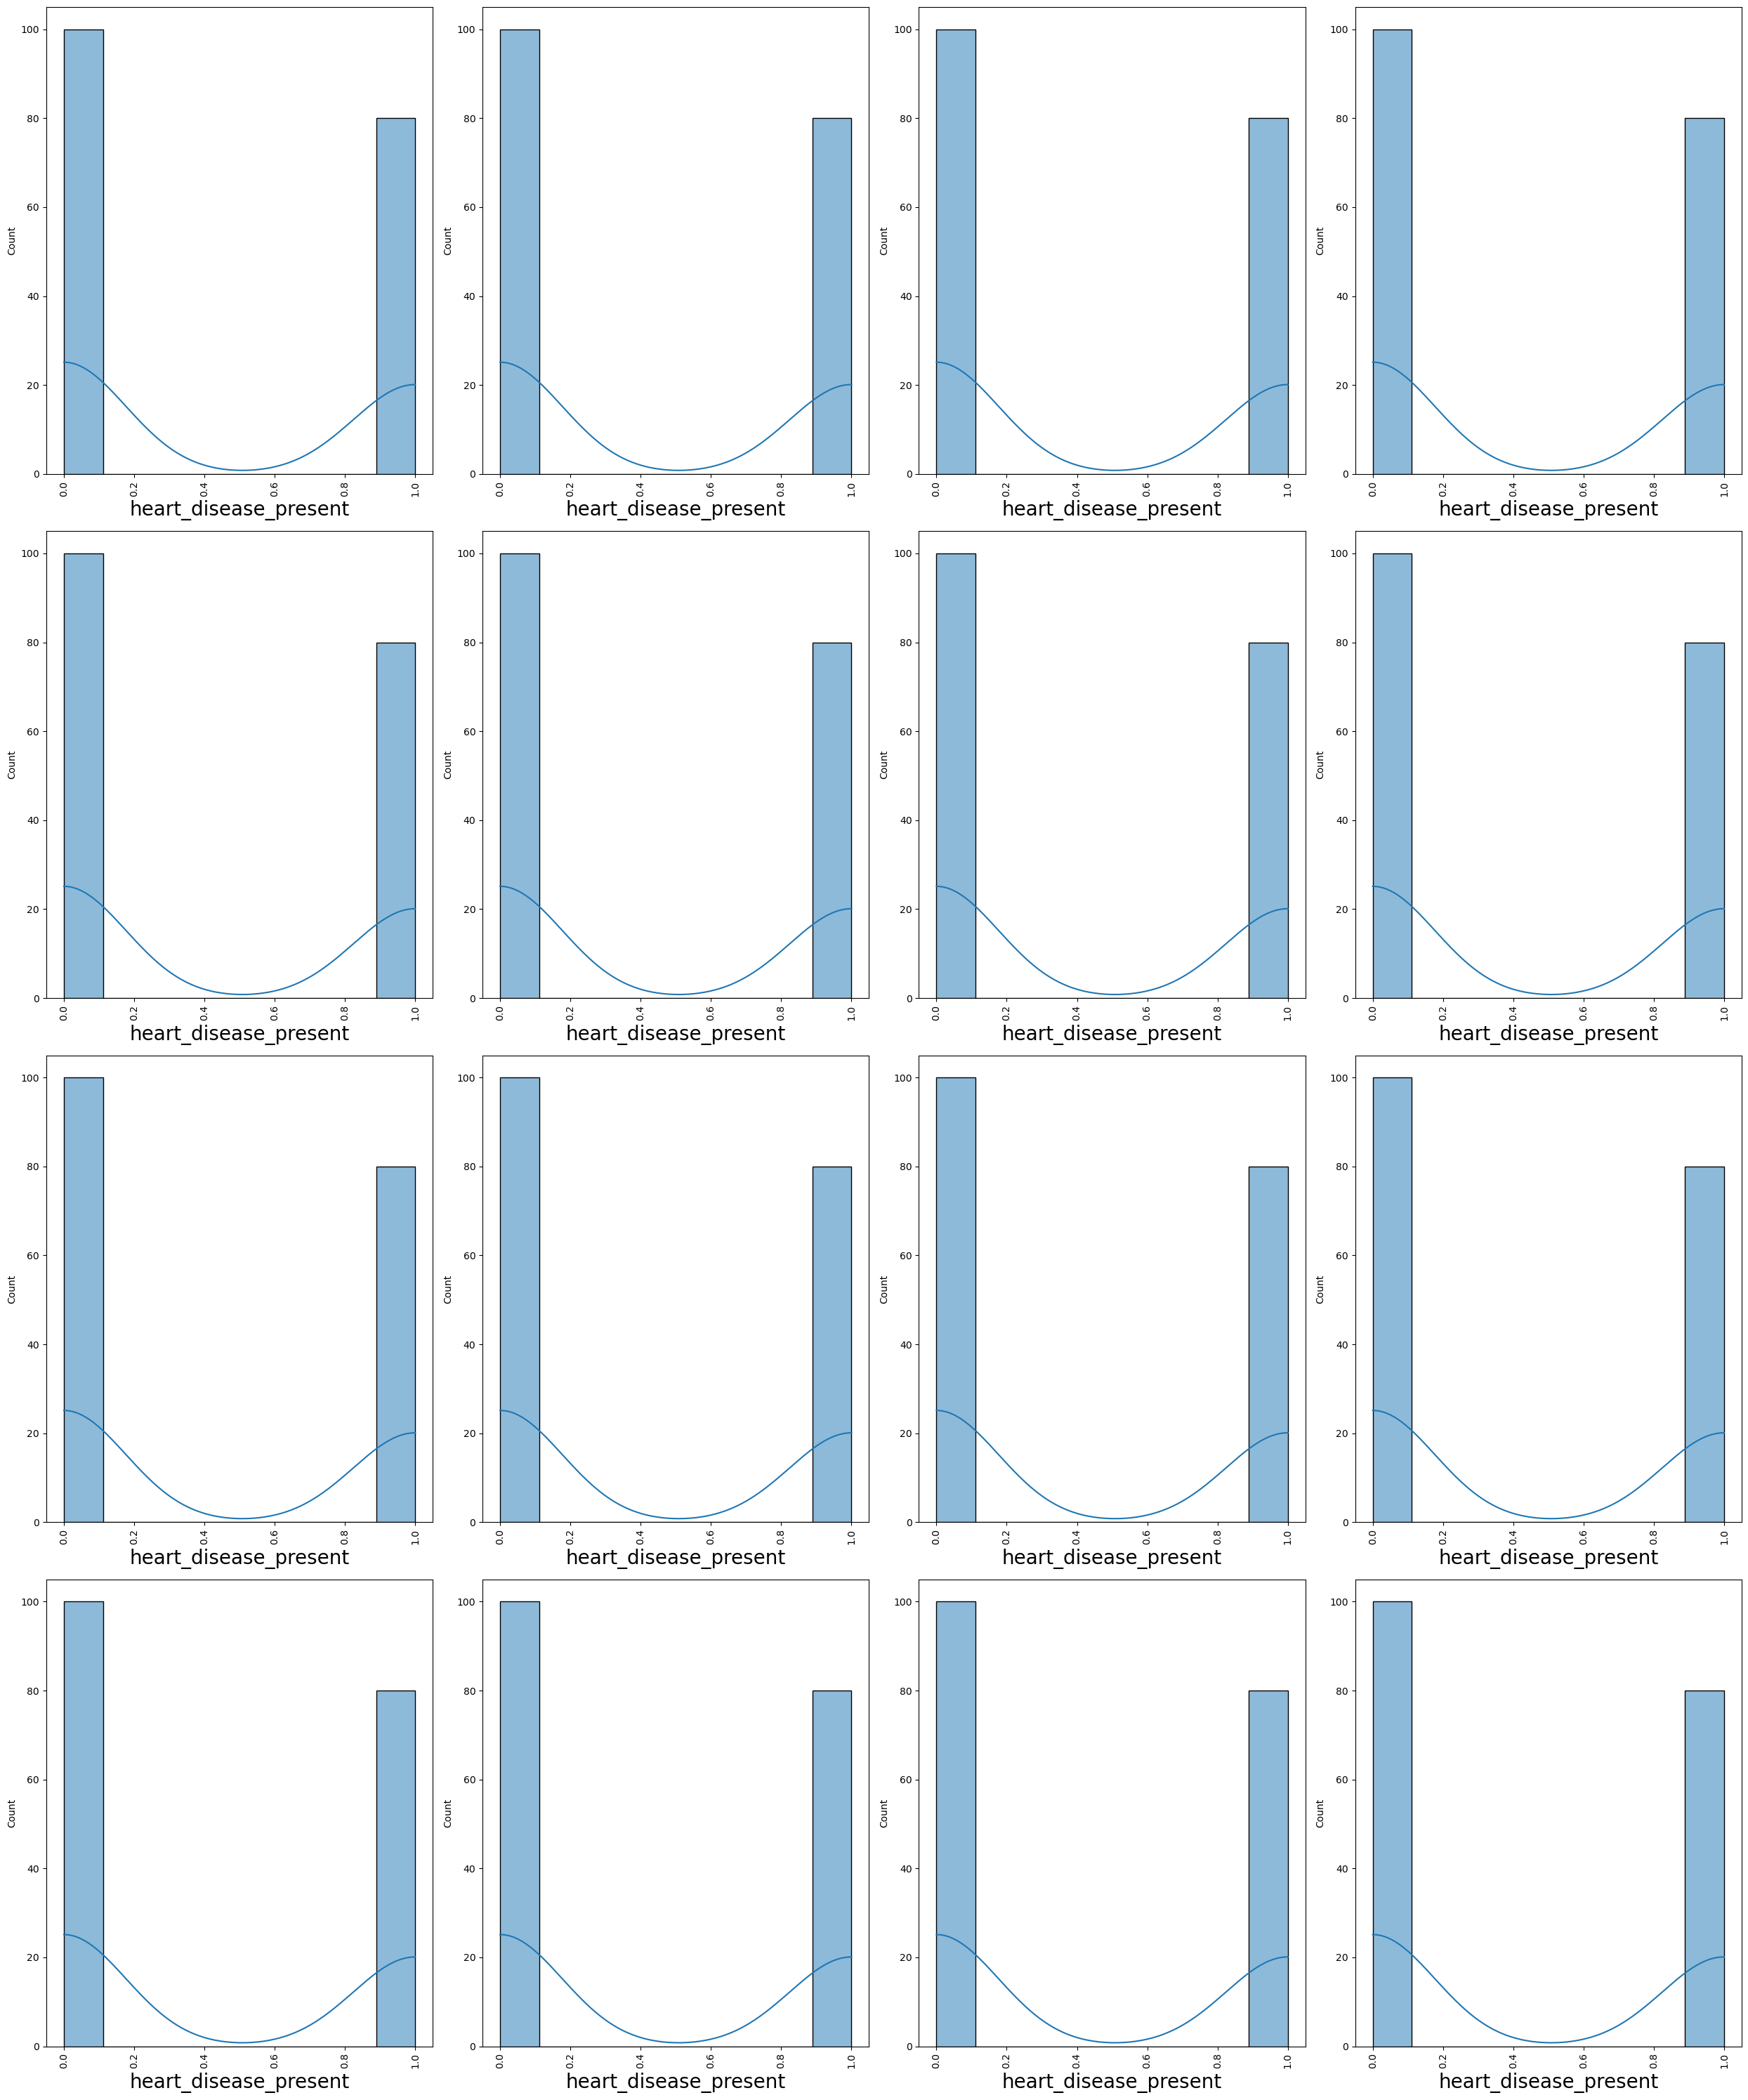

In [27]:
# Univeriant Analysis
plt.figure(figsize=(25,30))  # define the plot size
plt_num = 1
for column in data2:
    if plt_num <= 16: # assighn the column value
        plt.subplot(4,4,plt_num) # row and column assighn
        sns.histplot(data2[columns],kde=True) # create the histogram plot
        plt.xlabel(columns,fontsize = 20)
        plt.xticks(rotation = 90) # assighn the xlabel value
    plt_num += 1
plt.tight_layout() # use for data show function

### Biavarinat Analysis

In [29]:
data2.columns #show the columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'patient_id',
       'heart_disease_present'],
      dtype='object')

<Axes: xlabel='slope_of_peak_exercise_st_segment', ylabel='heart_disease_present'>

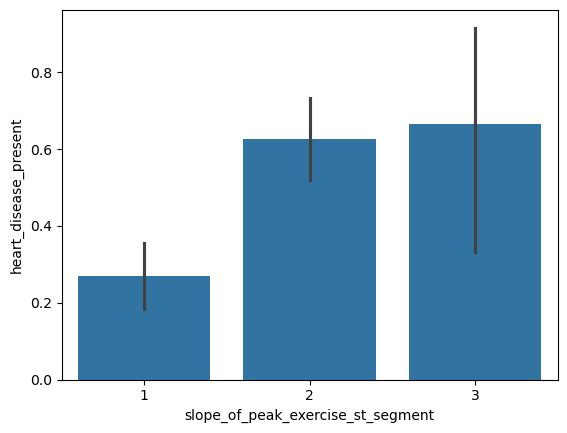

In [30]:
sns.barplot(x = data2.slope_of_peak_exercise_st_segment,y = data2.heart_disease_present) #create a bar plot graph analyzing heart_disease_present & slope_of_peak_exercise_st_segment

- This graph shows that individuals with an upsloping ST segment (category 1) during peak exercise have the lowest likelihood of heart disease, while those with a downsloping ST segment (category 3) have the highest likelihood. A flat ST segment (category 2) is also strongly associated with heart disease, but less so than the downsloping type.


<Axes: xlabel='thal', ylabel='heart_disease_present'>

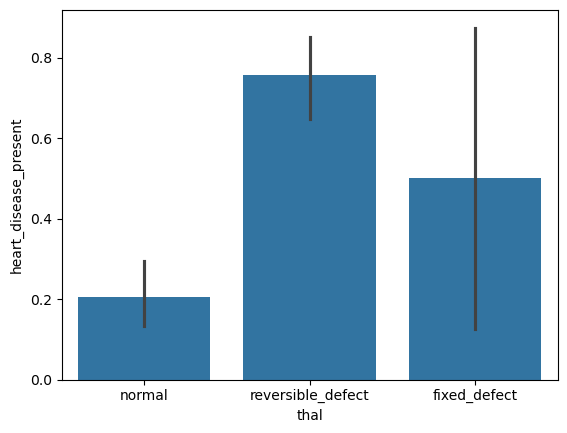

In [32]:
sns.barplot(x = data2.thal,y = data2.heart_disease_present) #create a bar plot graph analyzing heart_disease_present & thal

- This graph shows that individuals with a reversible defect have the highest likelihood of heart disease presence, followed by those with a fixed defect (~0.5). In contrast, individuals with a normal thalassemia result have the lowest likelihood of heart disease (0.2). This suggests that reversible defects are the strongest indicator of heart disease among the three categories.

<Axes: xlabel='resting_blood_pressure', ylabel='heart_disease_present'>

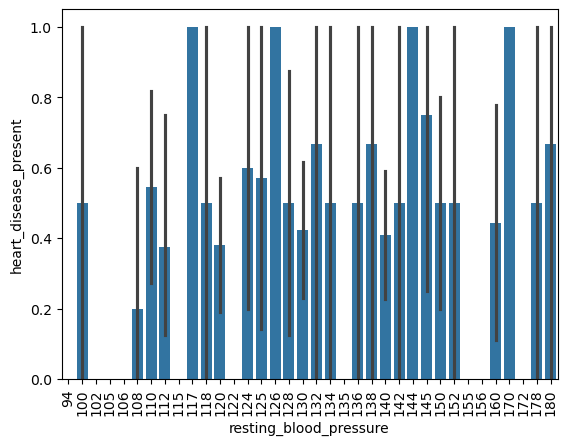

In [34]:
plt.xticks(rotation = 90) # used for x axis value show in 90
sns.barplot(x = data2.resting_blood_pressure,y = data2.heart_disease_present) #create a bar plot graph analyzing heart_disease_present & resting_blood_pressure

- This graph indicates the relationship between resting blood pressure and the presence of heart disease. There is significant variability in heart disease presence across different blood pressure levels. While no clear trend is observed, some resting blood pressure values around 110-120 and 170-180 show higher chances of heart disease presence. This suggests that extreme blood pressure values, whether low or high, may correlate more strongly with heart disease.

<Axes: xlabel='chest_pain_type', ylabel='heart_disease_present'>

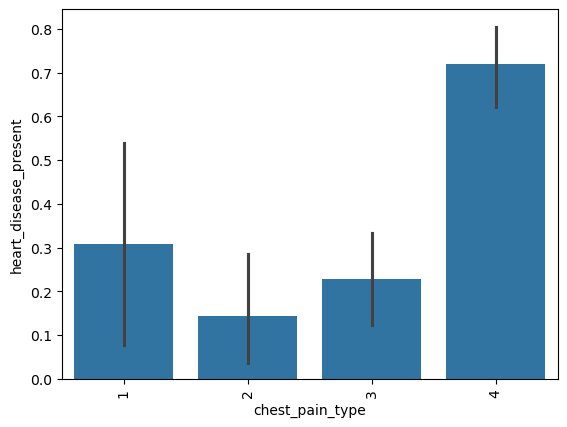

In [36]:
plt.xticks(rotation = 90) # used for x axis value show in 90
sns.barplot(x = data2.chest_pain_type,y = data2.heart_disease_present) #create a bar plot graph

- The bar plot shows the relationship between chest pain type and the presence of heart disease. The highest percentage of heart disease cases are seen in patients with chest pain type 4, followed by chest pain type 1. The lowest percentage of heart disease cases are seen in patients with chest pain type 2. This suggests that chest pain type is a significant factor in predicting the presence of heart disease.

<Axes: xlabel='num_major_vessels', ylabel='heart_disease_present'>

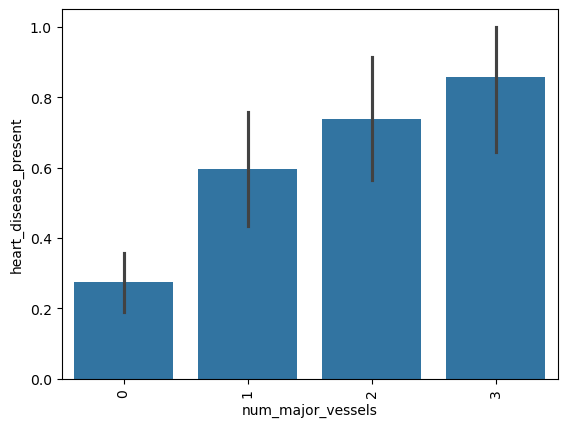

In [38]:
plt.xticks(rotation = 90) # used for x axis value show in 90
sns.barplot(x = data2.num_major_vessels,y = data2.heart_disease_present) #create a bar plot graph analyzing heart_disease_present & num_major_vessels

- The bar chart shows the relationship between the number of major vessels and the presence of heart disease. The y-axis represents the probability of having heart disease. As the number of major vessels increases, the probability of having heart disease also increases. The highest probability of having heart disease is observed when the number of major vessels is 3.


In [40]:
data2.columns # used for show all column

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'patient_id',
       'heart_disease_present'],
      dtype='object')

<Axes: xlabel='fasting_blood_sugar_gt_120_mg_per_dl', ylabel='heart_disease_present'>

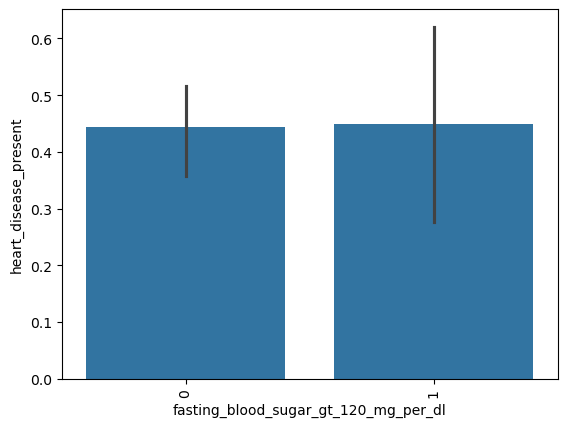

In [41]:
plt.xticks(rotation = 90) # used for x axis value show in 90
sns.barplot(x = data2.fasting_blood_sugar_gt_120_mg_per_dl,y = data2.heart_disease_present) #create a bar plot graph analyzing heart_disease_present & fasting_blood_sugar_gt_120_mg_per_dls

- The bar plot shows that there is a slightly higher prevalence of heart disease in individuals with fasting blood sugar greater than 120 mg per dl. However, the difference is not statistically significant as the error bars overlap. The error bars represent the confidence interval, which means that we are confident that the true mean of the population lies within the range of the error bars. Therefore, we cannot say with certainty that there is a difference in the prevalence of heart disease between these two groups.


<Axes: xlabel='resting_ekg_results', ylabel='heart_disease_present'>

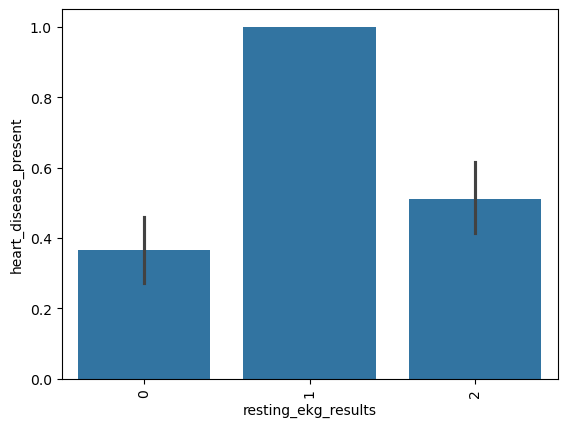

In [43]:
plt.xticks(rotation = 90)  # used for x axis value show in 90
sns.barplot(x = data2.resting_ekg_results,y = data2.heart_disease_present) #create a bar plot graph analyzing heart_disease_present & resting_ekg_results

- The image shows a barplot visualizing the relationship between resting EKG results and the presence of heart disease. It reveals that individuals with resting EKG results of 1 have the highest probability of having heart disease, followed by those with results of 2, and lastly those with results of 0.

<Axes: xlabel='oldpeak_eq_st_depression', ylabel='heart_disease_present'>

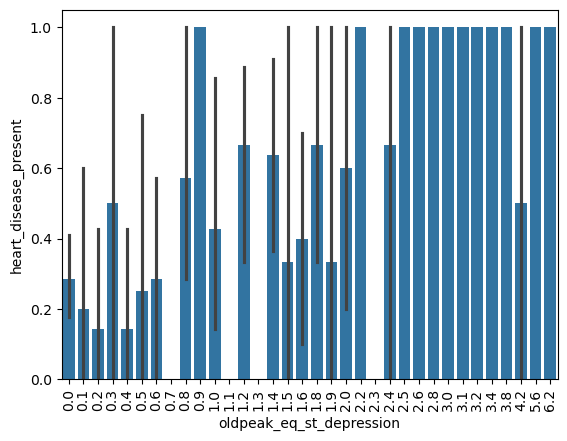

In [45]:
plt.xticks(rotation = 90)  # used for x axis value show in 90
sns.barplot(x = data2.oldpeak_eq_st_depression,y = data2.heart_disease_present) #create a bar plot graph analyzing heart_disease_present & oldpeak_eq_st_depression

- The bar plot shows the relationship between the oldpeak_eq_st_depression value and the presence of heart disease. It can be observed that the presence of heart disease increases with the increasing value of oldpeak_eq_st_depression. This suggests that higher values of oldpeak_eq_st_depression may be associated with a greater risk of heart disease.


<Axes: xlabel='sex', ylabel='heart_disease_present'>

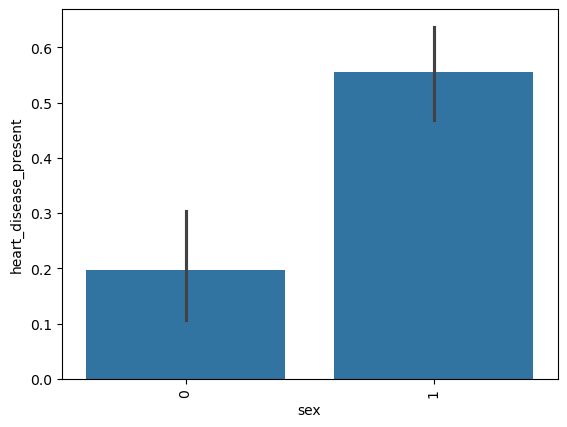

In [47]:
plt.xticks(rotation = 90) # used for x axis value show in 90
sns.barplot(x = data2.sex,y = data2.heart_disease_present) #create a bar plot graph analyzing heart_disease_present & sex

- the bar chart shows the percentage of people with heart disease based on their sex. The chart shows that a higher percentage of males have heart disease than females.

<Axes: xlabel='age', ylabel='heart_disease_present'>

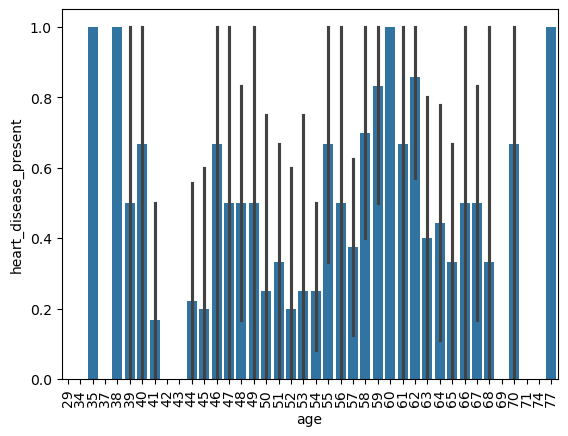

In [49]:
plt.xticks(rotation = 90) # used for x axis value show in 90
sns.barplot(x = data2.age,y = data2.heart_disease_present) #create a bar plot graph analyzing heart_disease_present & age

- The graph shows the prevalence of heart disease across different ages. The bar height indicates the proportion of people with heart disease at that age. We can see that heart disease is more common in older individuals, with the highest prevalence observed in individuals in their 70s. However, it is worth noting that the sample size for each age group may vary, potentially affecting the accuracy of the results.

<Axes: xlabel='exercise_induced_angina', ylabel='heart_disease_present'>

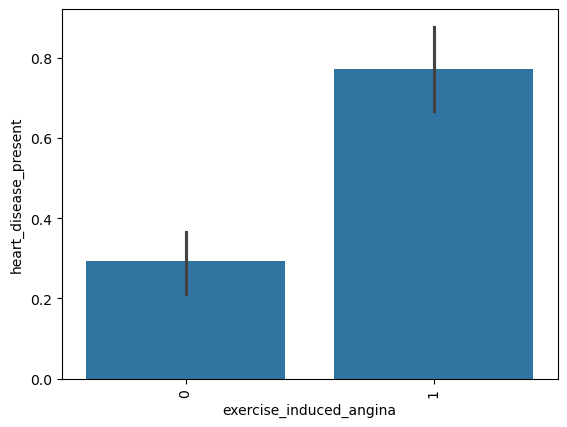

In [51]:
plt.xticks(rotation = 90) # used for x axis value show in 90
sns.barplot(x = data2.exercise_induced_angina,y = data2.heart_disease_present) #create a bar plot graph analyzing heart_disease_present & exercise_induced_angina

- The barplot shows that there is a higher proportion of people with heart disease present who experience exercise-induced angina. This suggests that exercise-induced angina may be a potential indicator of heart disease.

### Multivariant Analysis

In [54]:
data2.head() #showning the top 5 data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


In [55]:
data3 = data2.drop("patient_id",axis=1) # drop this column 
data3

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


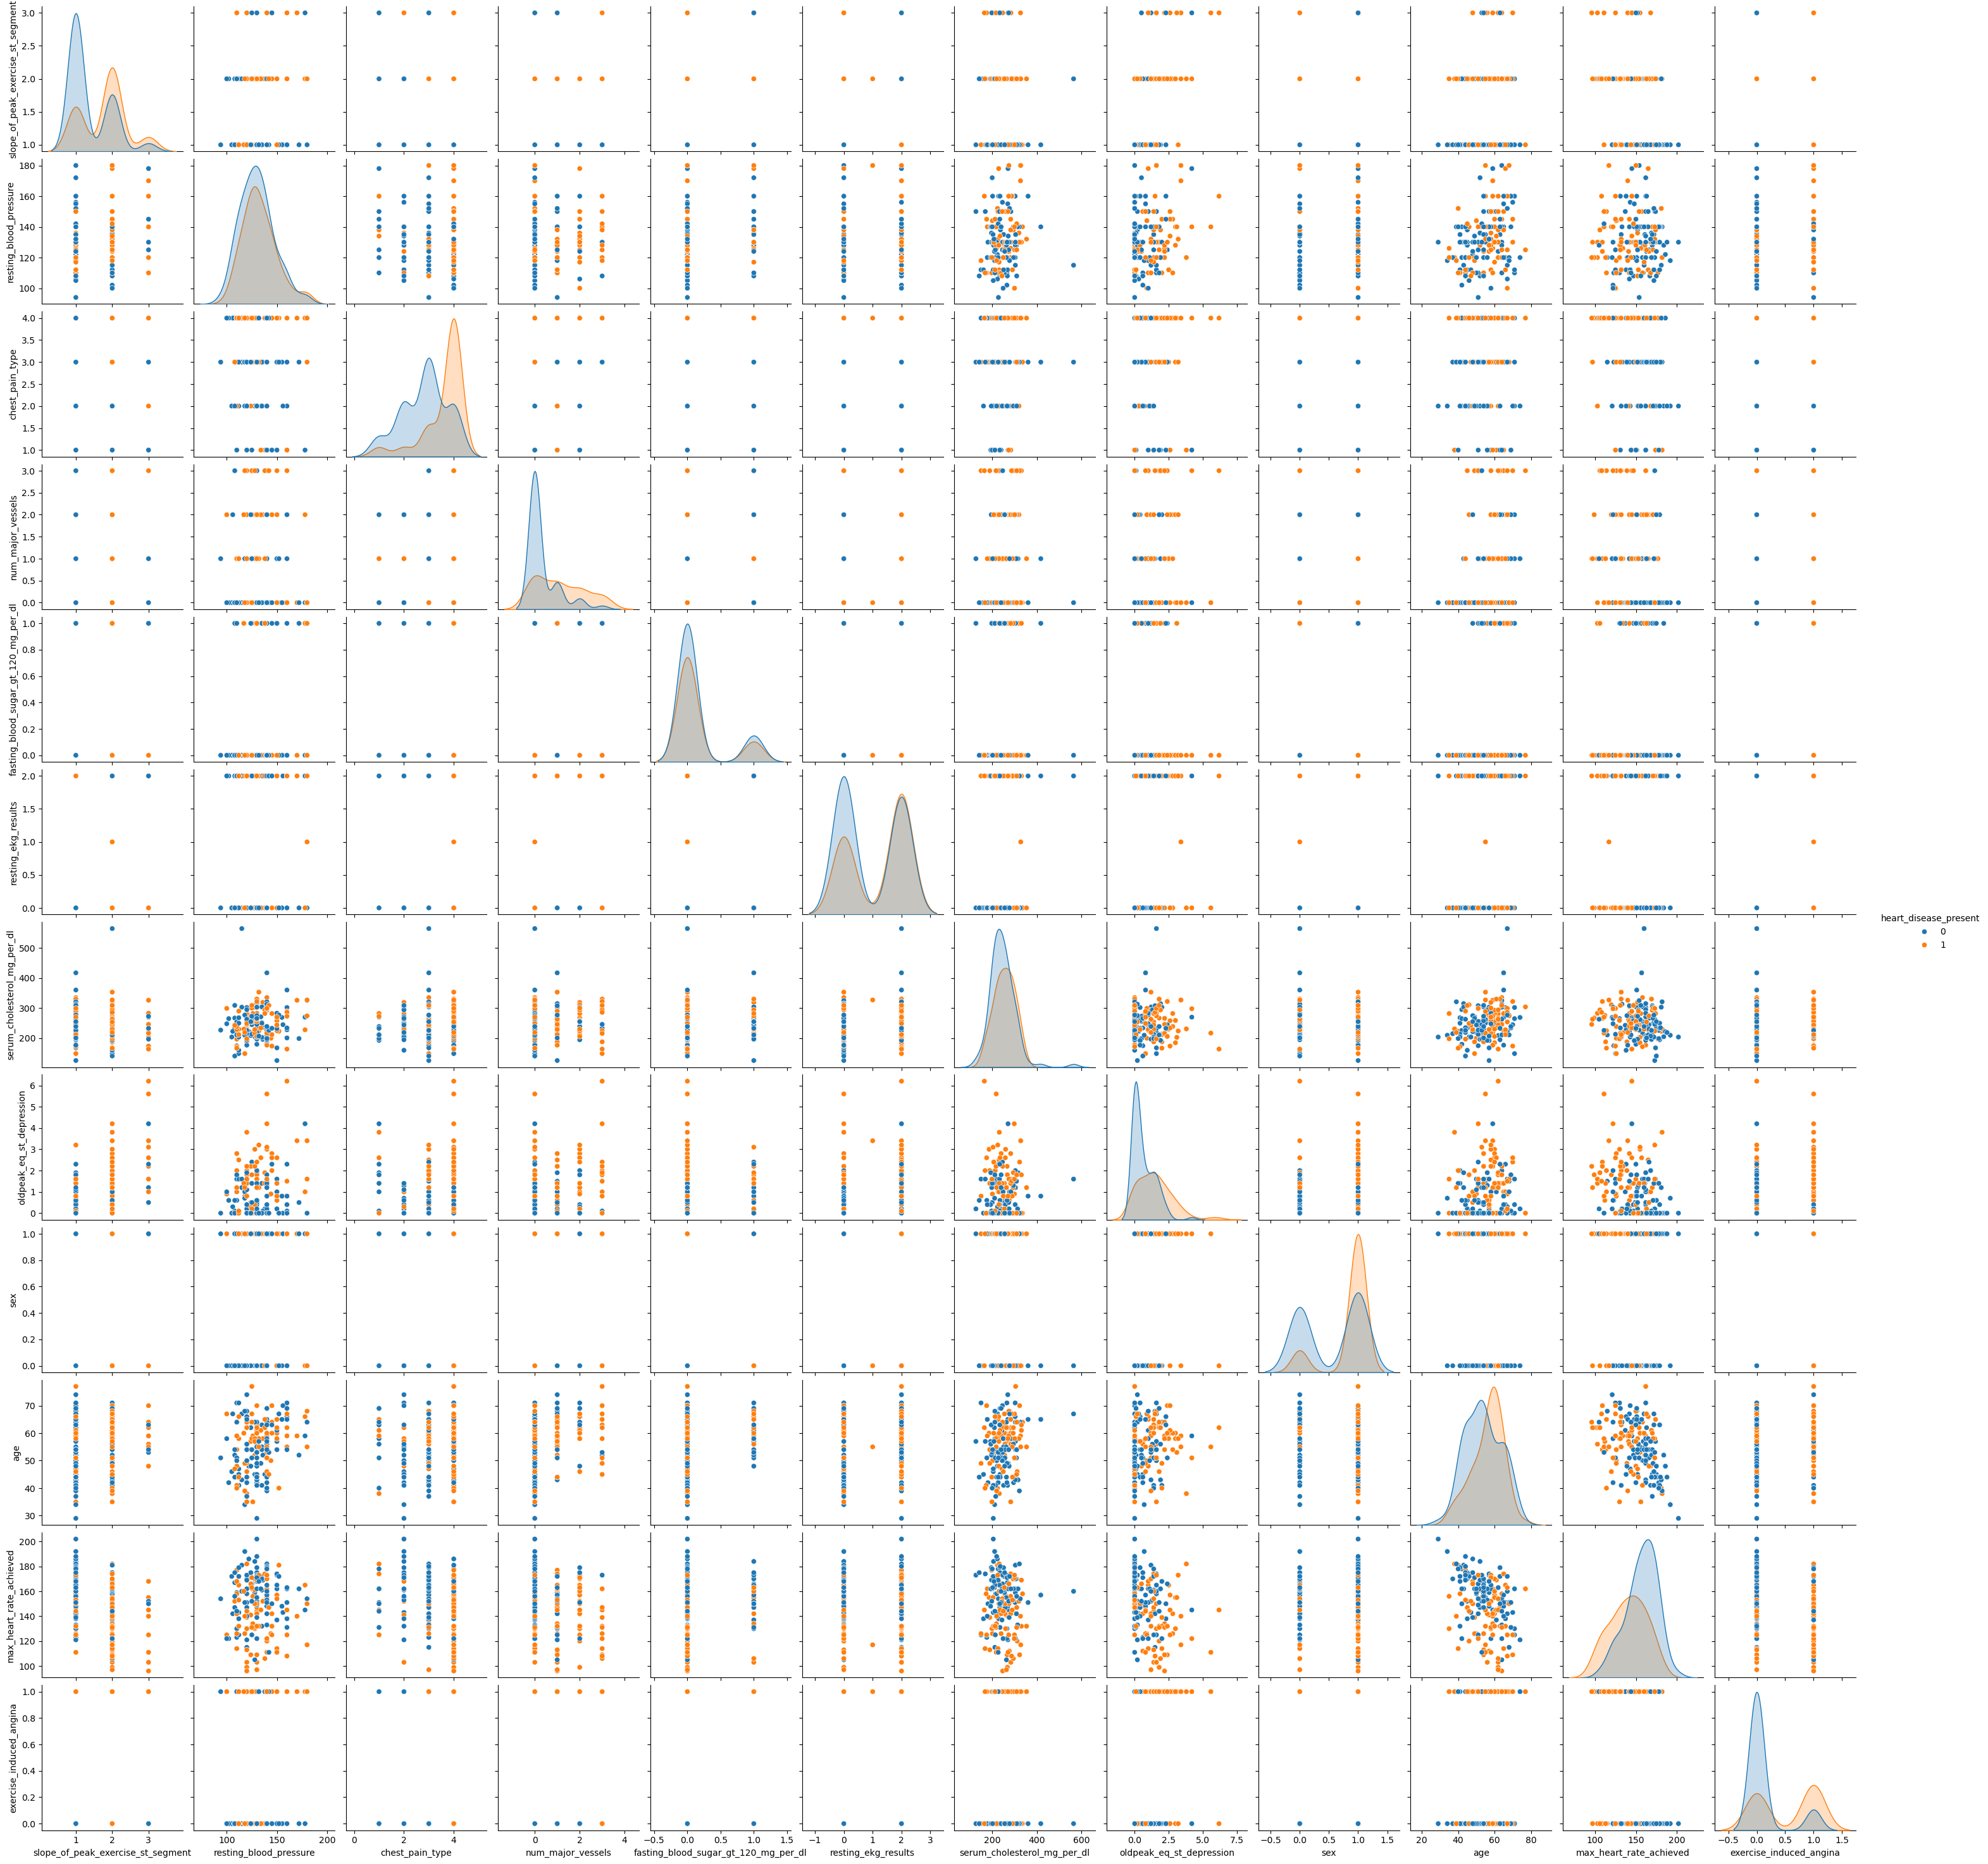

In [56]:
# Multivariant Analysis
sns.pairplot(data3,hue = "heart_disease_present") 

* Here we can not see the any insights in this plot graph.

## Final Report of EDA

- Downsloping ST segment and reversible thalassemia defect are the strongest predictors of heart disease.
- Increased number of major vessels correlates with a higher probability of heart disease.
- Chest pain type 4 and resting EKG result 1 are strongly associated with heart disease.
- Higher oldpeak_eq_st_depression values indicate a greater risk of heart disease.
- Males and older individuals show a higher prevalence of heart disease.
- Exercise-induced angina is a notable indicator of heart disease presence.

## Feature Engineering

**Feature Engineering:-** It is the process of using domain knowledge to select, modify, or create new features from raw data that can improve the performance of machine learning models. It involves transforming raw data into a format that is more suitable for modeling and can significantly impact model accuracy and effectiveness.

#### 1. Data Preprocessing:-

**Data Preprocessing:-** It is the comprehensive set of techniques and processes used to clean, transform, and organize raw data into a suitable format for analysis or machine learning. It is a critical step in the data analysis pipeline that ensures the quality and relevance of the data used for modeling.

In [64]:
data3.isnull().sum() #check the Null valuse

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

- Here we can not see the null values.

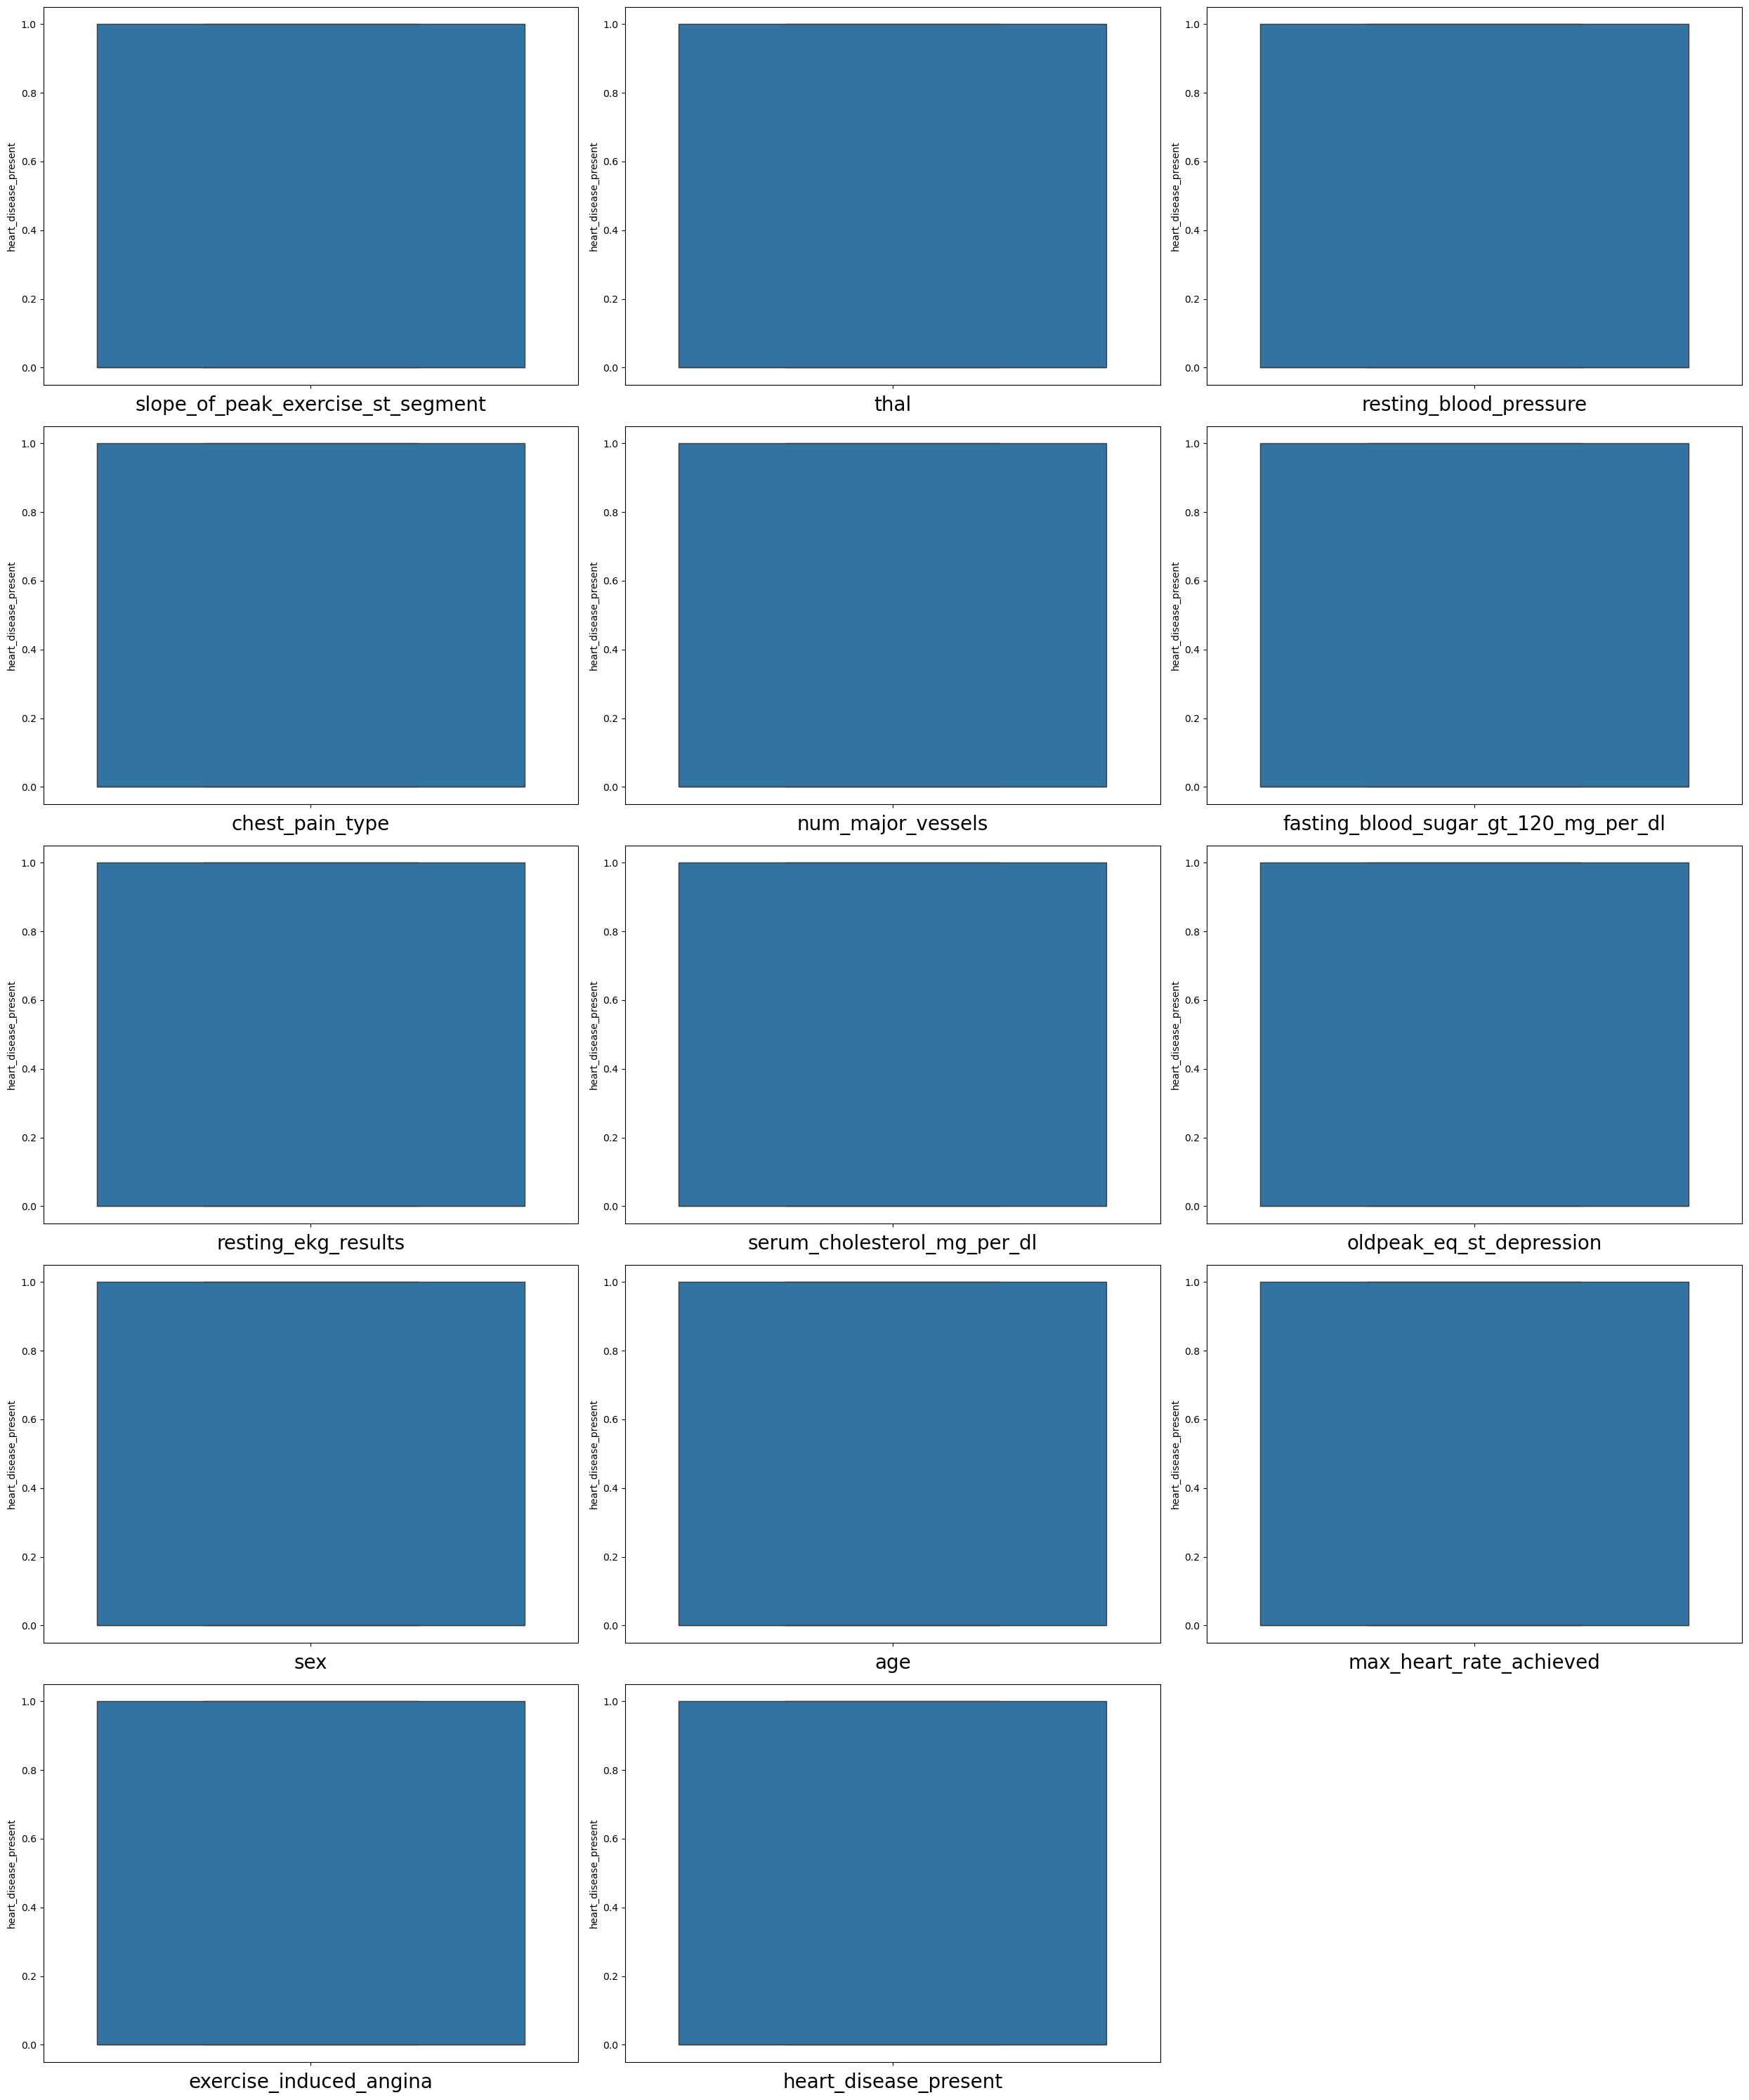

In [66]:
# use for check the outliers in our dataset columns
plt.figure(figsize=(25,30)) # define the plot size
plt_num = 1
for column in data3: 
    if plt_num <= 14:  # assighn the column value
        plt.subplot(5,3,plt_num) # row and column assighn
        sns.boxplot(data3[columns])  # create the boxplot plot
        plt.xlabel(column,fontsize = 20)  # assighn the xlabel value
        plt.xticks(rotation = 90)
    plt_num += 1
plt.tight_layout() # use for data show function

-  Here we can not see the outliers in any columns

In [68]:
data3.head() #showning the top 5 data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [69]:
data3.thal.unique() #Check the unique value for thal column 

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

#### Encoding :-

* So basically we have some columns which has data into categorical. So, we have to change that into numerical. Because our machine don't understand categorical data.
  
* To convert categorical data into numerical we have some technique which are,

**There are three types:-** 
1. Label Encoder
2. Ordinal Encoder
3. One Hot Encoder

In [98]:
#We are going to apply OneHot Encoding in this feature
from sklearn.preprocessing import OneHotEncoder 
OE = OneHotEncoder() # call the onehot encoding 
df = pd.get_dummies(data3["thal"],dtype=int,prefix="thal") 

In [100]:
df

,thal_fixed_defect,thal_normal,thal_reversible_defect
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
175,0,0,1
176,0,1,0
177,0,0,1
178,0,1,0


* We use OneHot encoder for that data where we can't compare which unique values in  better than another unique value. It create a dummy features for all uniques values and where values is present it give 1 and rest of features assign with 0.

In [103]:
data3 = pd.concat([data3,df],axis=1) #merge the data3 and df
data3 

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1,0,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1,0,1,0
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1,0,0,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0,0,1,0


In [105]:
data3.head()  #showning the top 5 data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1


In [107]:
data4 = data3.drop("thal",axis=1) #drop the thal column
data4

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1,0,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1,0,1,0
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1,0,0,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0,0,1,0


#### 2. Feature Selection

**Feature Selection:-** It is the process of identifying and selecting a subset of relevant features (variables, predictors) from a larger set of available features in a dataset. The goal of feature selection is to improve the performance of machine learning models by retaining only the most important and informative features, while eliminating redundant or irrelevant ones.

<Axes: >

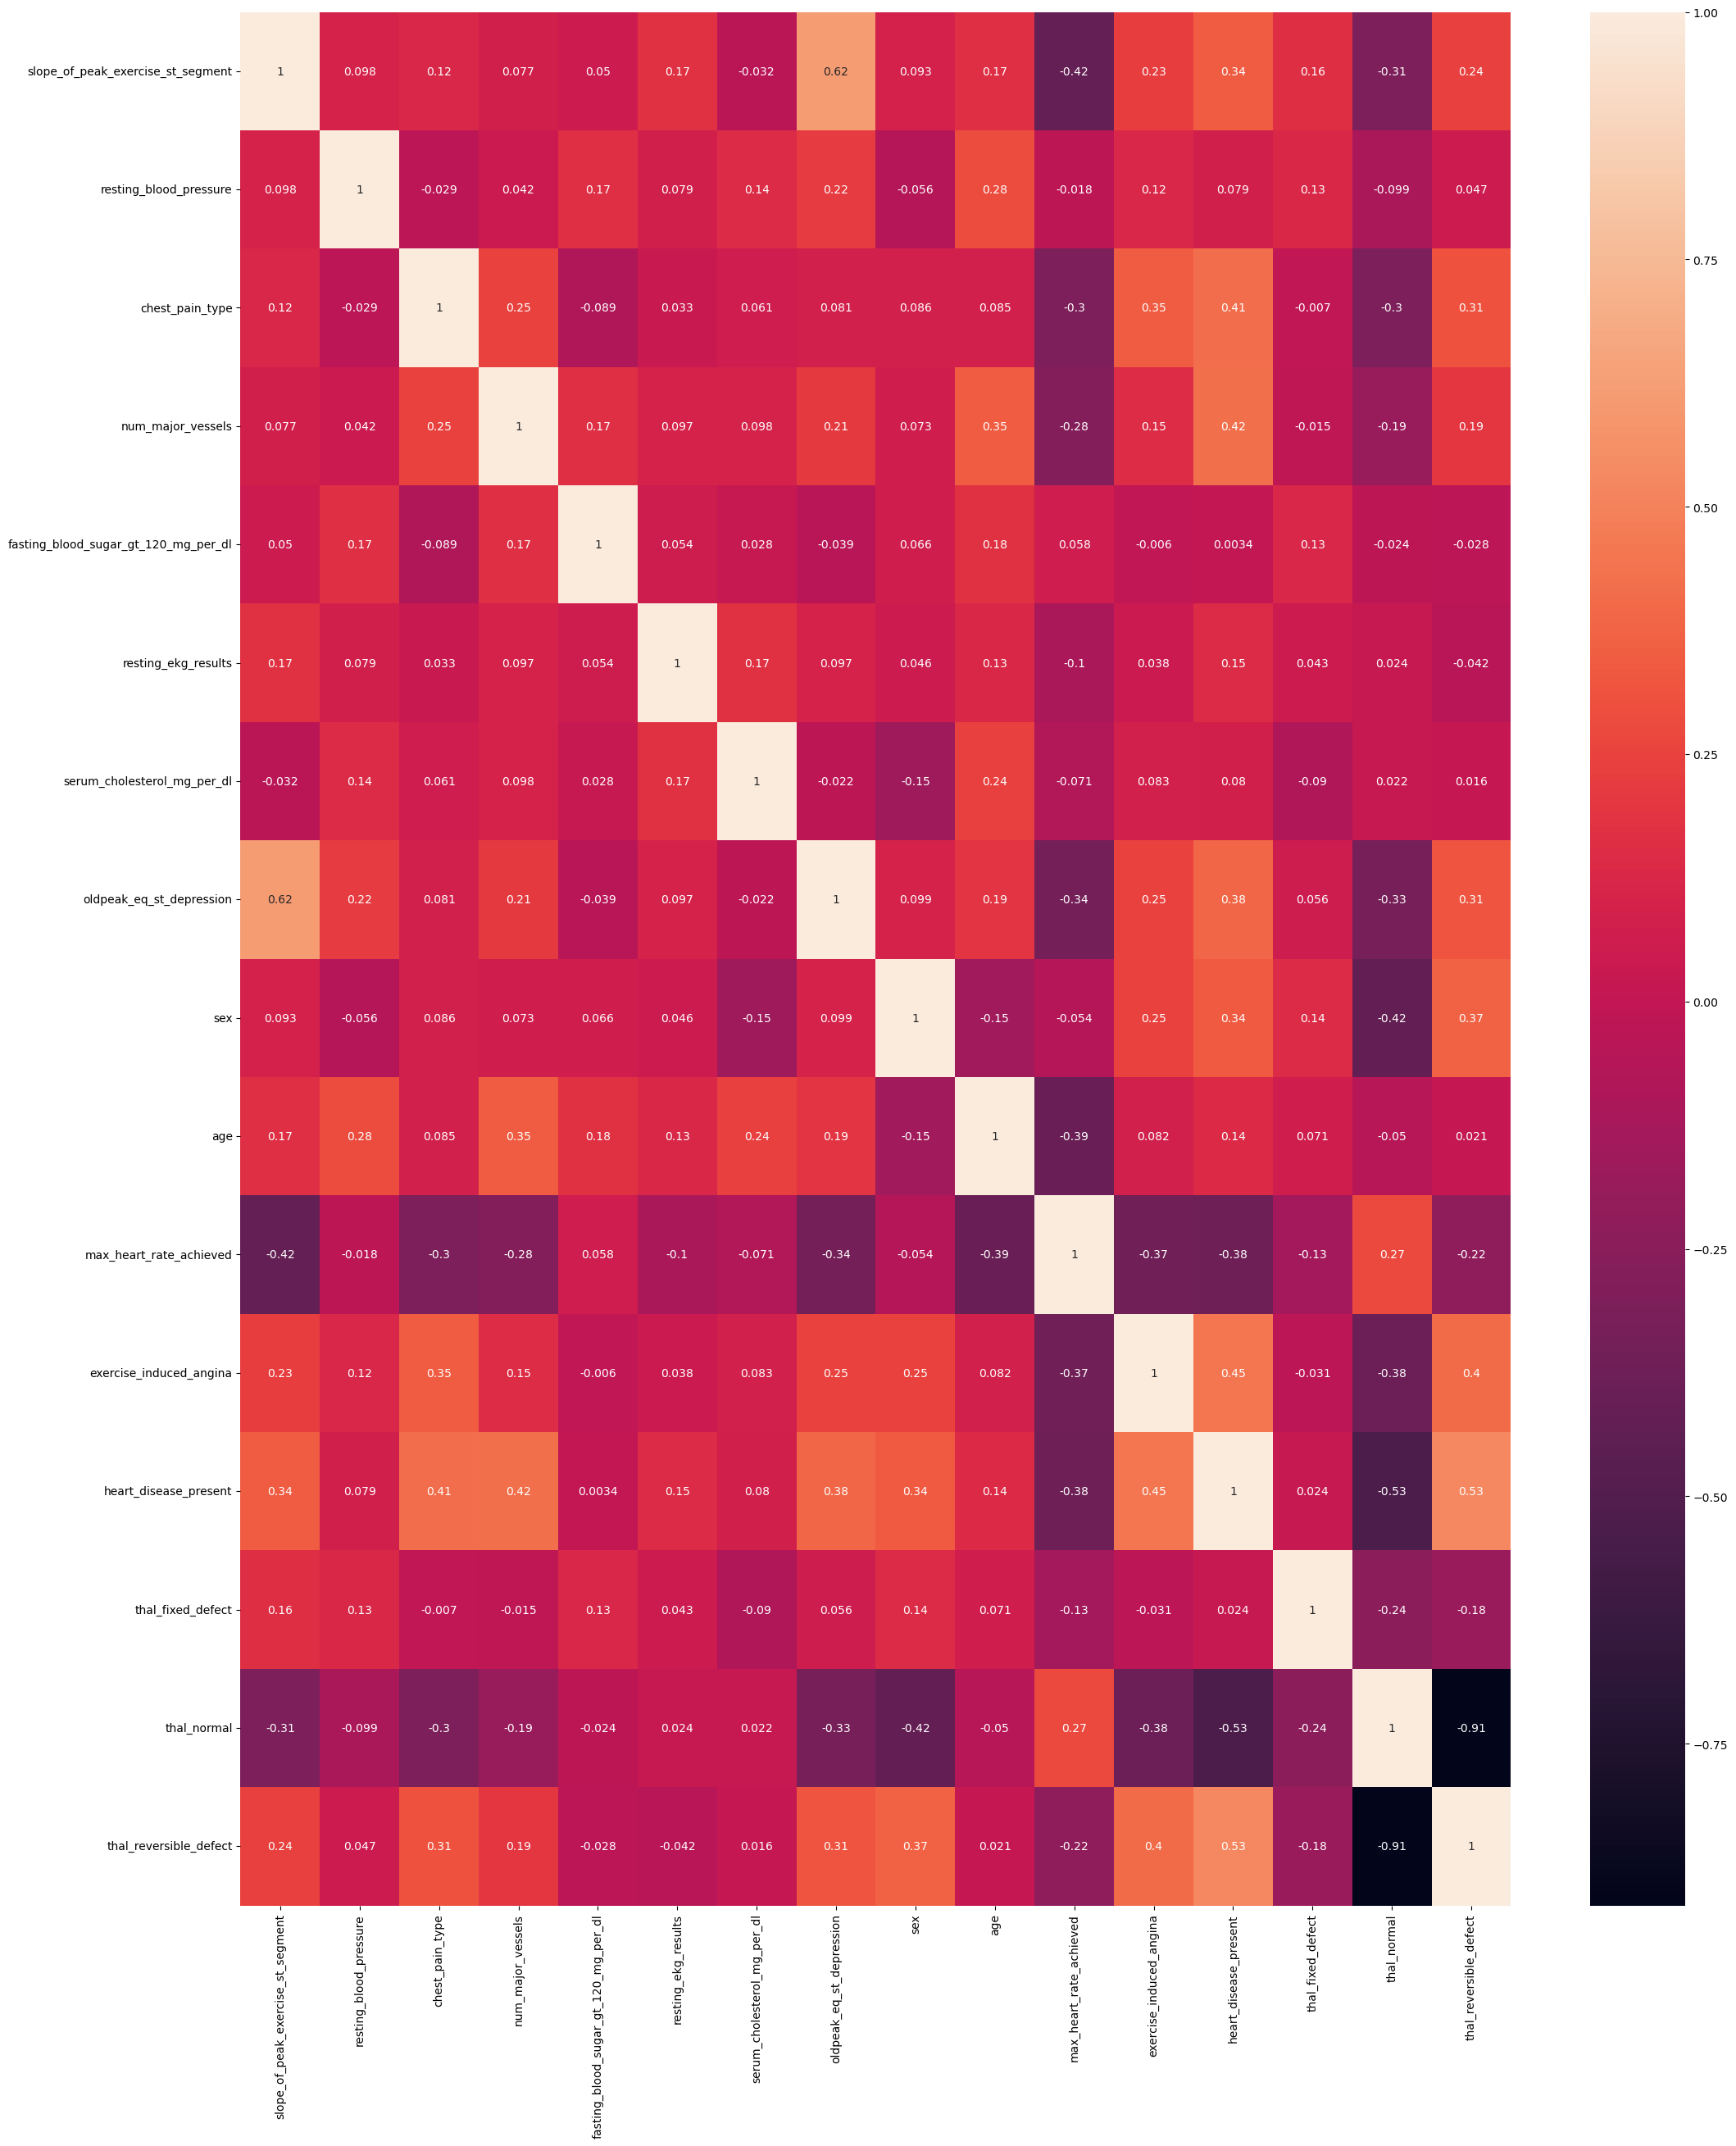

In [111]:
plt.figure(figsize=(25,30)) #define the plot size
sns.heatmap(data4.corr(),annot=True)  # craete a heatmap check the relationship

* Here we can se that no any columns are correlated more than 62%

## Model Selection

In [115]:
x = data4.drop(["heart_disease_present","thal_normal"],axis=1)  # create the independent variable
y = data4.heart_disease_present # create the dependent variable

In [117]:
x # Show the independent variable

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,0,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,0,0
177,2,125,3,0,0,0,309,1.8,1,64,131,1,0,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0,0


In [119]:
y # Show the dependent variable

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

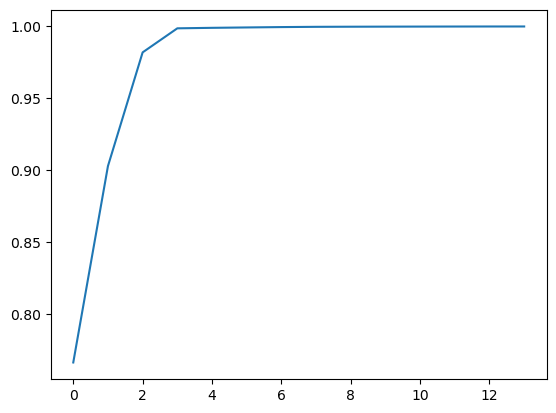

In [121]:
from sklearn.decomposition import PCA #import the PCA class from sklearn.decomposition
pca = PCA() #create an instance of PCA
principle_components = pca.fit_transform(x) #fit the PCA model to the data
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #plot the cumulative sum of the explained variance ratio
plt.show() #show the plot

In [123]:
np.where(np.cumsum(pca.explained_variance_ratio_) <=95) #Find the indices where the cumulative sum of the explained variance ratio is less than or equal to 95%

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       dtype=int64),)

In [125]:
pca = PCA(n_components=13) #Initialize PCA with 13 components (reduce to 13 dimensions)
new_data = pca.fit_transform(x) #Fit the PCA on the data 'x' and apply the dimensionality reduction
column_name = [f"principle_components {i}" for i in range(1,14)] #Create a list of column names for the resulting principal components (PC1 to PC13)
principle_components = pd.DataFrame(data = new_data,columns=column_name) #Create a DataFrame using the transformed data (new_data) with the principal components as column names

In [127]:
principle_components

,principle_components 1,principle_components 2,principle_components 3,principle_components 4,principle_components 5,principle_components 6,principle_components 7,principle_components 8,principle_components 9,principle_components 10,principle_components 11,principle_components 12,principle_components 13
0,57.224673,24.897468,-6.585693,-6.950714,-0.498367,1.143353,-0.702174,0.473306,-0.240881,-0.170097,0.281744,0.007909,-0.226698
1,-36.582892,7.724451,-18.456388,5.323433,0.396723,0.360897,1.350022,-0.530375,0.803439,0.251259,-0.231093,0.052578,0.000827
2,54.821558,11.002912,-4.854981,23.309056,0.389376,-1.527594,-1.555668,0.507700,-0.353325,-0.170931,-0.097076,0.679245,-0.735176
3,-26.888793,31.555168,21.798981,-11.593581,-0.662550,-1.499227,0.071183,-0.657484,-0.256094,-0.017709,0.155463,-0.597597,0.008689
4,23.533815,-6.178210,45.104281,-5.307765,2.079169,2.720954,1.185086,0.375187,-0.430061,0.091120,0.088755,-0.675216,-0.194334
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.481950,11.472712,-3.549765,15.168344,0.118887,-1.834035,0.279708,0.086815,-0.544943,1.085283,0.219959,-0.341666,0.403943
176,81.333743,-30.277071,41.122330,-16.078001,0.500684,0.282499,0.975933,-0.900890,1.050318,-0.465690,-0.109356,0.545905,0.044490
177,60.369941,-16.735047,-9.482113,4.991556,-0.023201,0.322591,1.771217,-0.725624,-0.854583,-0.071064,-0.171676,0.126250,-0.133542
178,4.124611,26.871940,-6.695249,-0.947271,-0.150031,-1.447987,0.142075,1.379321,0.003266,0.483729,0.504620,0.371987,0.395219


In [129]:
data3["heart_disease_present"].value_counts() #check the value count 

heart_disease_present
0    100
1     80
Name: count, dtype: int64

## Scaling

**Scaling:-** Scaling is very important of continous features because some model give more priproty to that features which has higest values campare to another features. that's why we use Scaling to make all values into certain range.

**Basically there are 2 type of scaling:-**

1. MinMax Scaling
2. Standardization Scaling

**MinMax Scaling:-** MinMax Scaling transform all data between 0 to 1 range.

**Standardization Scaling:-** Standardization Scaling transform all data between -3 to +3 range. it use z-score to tranform data.






In [133]:
from sklearn.preprocessing import StandardScaler #Import the StandardScaler class from sklearn
SD = StandardScaler() #Create an instance of the StandardScaler
df2 = SD.fit_transform(principle_components) #Fit the scaler to the principal components DataFrame and transform the data
df2

array([[ 1.08554361,  1.11784297, -0.38863672, ...,  0.75979599,
         0.02193419, -0.69427807],
       [-0.69397207,  0.34681128, -1.08915346, ..., -0.6232019 ,
         0.14581586,  0.00253297],
       [ 1.03995688,  0.49400717, -0.2865035 , ..., -0.26179079,
         1.88375727, -2.25152958],
       ...,
       [ 1.14520888, -0.75136774, -0.55956108, ..., -0.46296891,
         0.35013156, -0.40898228],
       [ 0.07824326,  1.20649253, -0.39510192, ...,  1.36083873,
         1.03163516,  1.21038617],
       [-0.89341512,  0.44673745,  1.87481788, ..., -0.83706343,
        -0.4329253 , -0.47933464]])

In [135]:
principle_components.columns #Get the column names of the DataFrame containing the principal components

Index(['principle_components 1', 'principle_components 2',
       'principle_components 3', 'principle_components 4',
       'principle_components 5', 'principle_components 6',
       'principle_components 7', 'principle_components 8',
       'principle_components 9', 'principle_components 10',
       'principle_components 11', 'principle_components 12',
       'principle_components 13'],
      dtype='object')

In [137]:
# Create a new DataFrame 'x1' using the standardized principal components (df2)
# Assign specific column names for each of the principal components
x1 = pd.DataFrame(data = df2,columns=['principle_components 1', 'principle_components 2',
       'principle_components 3', 'principle_components 4',
       'principle_components 5', 'principle_components 6',
       'principle_components 7', 'principle_components 8',
       'principle_components 9', 'principle_components 10',
       'principle_components 11', 'principle_components 12',
       'principle_components 13'])
x1 #show the DataFrame 

,principle_components 1,principle_components 2,principle_components 3,principle_components 4,principle_components 5,principle_components 6,principle_components 7,principle_components 8,principle_components 9,principle_components 10,principle_components 11,principle_components 12,principle_components 13
0,1.085544,1.117843,-0.388637,-0.891921,-0.444806,1.166045,-0.729907,0.590027,-0.455115,-0.386198,0.759796,0.021934,-0.694278
1,-0.693972,0.346811,-1.089153,0.683107,0.354086,0.368060,1.403343,-0.661170,1.517995,0.570473,-0.623202,0.145816,0.002533
2,1.039957,0.494007,-0.286503,2.991035,0.347528,-1.557912,-1.617112,0.632903,-0.667562,-0.388091,-0.261791,1.883757,-2.251530
3,-0.510076,1.416759,1.286407,-1.487697,-0.591344,-1.528983,0.073995,-0.819625,-0.483857,-0.040207,0.419247,-1.657323,0.026610
4,0.446433,-0.277388,2.661706,-0.681096,1.855713,2.774957,1.231892,0.467711,-0.812546,0.206884,0.239351,-1.872585,-0.595162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.085022,0.515100,-0.209480,1.946413,0.106110,-1.870435,0.290756,0.108224,-1.029601,2.464089,0.593176,-0.947546,1.237104
176,1.542889,-1.359376,2.426722,-2.063141,0.446873,0.288106,1.014478,-1.123057,1.984442,-1.057329,-0.294907,1.513965,0.136255
177,1.145209,-0.751368,-0.559561,0.640520,-0.020708,0.328994,1.841174,-0.904569,-1.614625,-0.161347,-0.462969,0.350132,-0.408982
178,0.078243,1.206493,-0.395102,-0.121555,-0.133907,-1.476725,0.147686,1.719473,0.006170,1.098286,1.360839,1.031635,1.210386


In [139]:
y1 = data4.heart_disease_present #Extract the target variable 'heart_disease_present' from the DataFrame 'data4'
y1 #show the target variable

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [297]:
from sklearn.model_selection import train_test_split #Import the train_test_split function from sklearn.model_selection
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=42)
#Split the dataset into training and testing sets
#x1: Features (principal components), y1: Target variable (heart disease presence)
#test_size=0.25: 25% of the data will be used for testing
#random_state=0: Ensures reproducibility of the split

In [299]:
x_train #tranning data

,principle_components 1,principle_components 2,principle_components 3,principle_components 4,principle_components 5,principle_components 6,principle_components 7,principle_components 8,principle_components 9,principle_components 10,principle_components 11,principle_components 12,principle_components 13
117,-1.499147,0.366056,-1.072363,-0.781998,-0.125201,-0.194667,-1.649088,-0.945817,-0.527964,-0.818060,0.142967,-1.568682,0.855090
65,0.593366,0.531517,-0.573530,-2.318844,-0.173199,-0.427486,-1.412060,-0.762468,-1.163985,-0.792504,-0.874612,0.218550,0.377578
67,0.968412,1.630104,-1.095903,-0.592114,0.861100,-0.753271,1.120438,-1.227315,0.683148,1.343930,1.512907,0.415951,-1.052098
31,-0.405171,-1.734994,1.103146,0.147107,0.039778,-1.069945,-1.573365,1.361703,1.112775,0.578659,-1.457998,-2.595866,0.022401
12,1.632686,0.466665,0.341500,0.835097,-1.377294,-0.194369,0.992723,-0.508893,-0.372405,-0.200816,1.615130,-0.011352,-1.104050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.876376,-0.279130,-1.072927,-0.535784,-1.089735,-0.726270,0.266354,-0.726612,0.540189,-0.429578,1.592763,0.179428,-0.135527
106,-0.318516,0.618085,1.202310,-0.098634,0.502376,0.597366,-0.587261,-0.647949,-0.718176,-1.828771,0.560426,-1.541282,0.523439
14,-0.393209,1.552134,-0.606550,-1.042816,2.530872,1.409617,2.689994,0.777079,-1.432172,-0.968704,-1.357061,1.169102,-0.027893
92,1.024463,1.021374,0.114258,0.087690,-1.054721,-0.319182,0.814264,-0.208401,0.827557,0.700125,0.072070,0.725438,2.501186


In [301]:
x_test #testing data

,principle_components 1,principle_components 2,principle_components 3,principle_components 4,principle_components 5,principle_components 6,principle_components 7,principle_components 8,principle_components 9,principle_components 10,principle_components 11,principle_components 12,principle_components 13
19,1.325484,0.225033,0.081230,0.109869,-0.533289,0.358637,-1.051758,2.329301,0.646645,0.469567,-0.557391,0.368662,2.084052
42,0.305000,-0.917314,-1.223972,1.984175,-1.006821,0.665213,-1.021517,0.292488,0.676695,-0.155188,-0.069446,0.508727,2.773262
153,0.740480,0.367991,-1.341548,-0.985140,-0.070524,-0.503472,-1.485388,0.083310,0.575871,-0.321709,1.396275,0.048944,-0.412189
78,0.643577,-0.331780,0.702342,0.059391,1.955871,-0.623228,-0.469184,0.003972,-0.540375,-0.657144,-0.443424,0.272560,-0.622220
145,-1.030539,1.100918,0.889267,1.698970,-0.609556,-0.741199,0.345057,1.890452,0.753762,0.130847,-1.536000,-0.181864,-1.070983
15,-0.905326,-1.122844,0.750814,-1.236733,-0.303768,0.148675,-1.190061,-1.181955,-1.034066,0.084404,-0.929209,-0.195273,-0.151082
24,-0.037480,-0.464610,1.558260,1.214693,-1.622717,1.439167,-0.851219,0.115885,-0.781730,-0.920943,0.914960,-0.419243,-1.035206
68,0.010598,0.500588,0.264519,0.201134,0.363441,1.728387,-0.166736,0.042348,1.018932,0.398826,-1.110788,-0.268419,-0.278428
113,0.528253,-0.126101,2.868058,0.492572,0.056599,0.689085,-0.400401,-1.041266,-1.917250,0.530513,-0.375043,0.629559,1.599845
118,1.975980,-0.552767,-0.379414,-0.762927,0.008603,-1.122915,1.130509,-0.374299,-1.047534,0.654927,-0.297254,0.135272,-0.722564


## Model Creation

## Logistic Regression

In [305]:
from sklearn.linear_model import LogisticRegression #Import the LogisticRegression class from sklearn.linear_model
LR = LogisticRegression() #Create an instance of the Logistic Regression model
LR.fit(x_train,y_train) #Fit the Logistic Regression model to the training data (x_train and y_train)


LogisticRegression()

In [307]:
y_lr = LR.predict(x_test) #Use the trained Logistic Regression model to make predictions on the test set
y_lr #show the predicted values

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [309]:
y_test #show the actual target values for the test set

19     1
42     0
153    1
78     1
145    0
15     1
24     0
68     0
113    1
118    1
93     1
159    1
69     1
142    0
45     1
16     0
51     0
125    0
96     1
56     1
97     0
120    1
143    1
30     0
9      0
172    1
60     0
18     0
148    1
173    1
109    1
55     0
140    1
126    0
66     1
29     0
Name: heart_disease_present, dtype: int64

In [311]:
# use for check the logistic regression model performance
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix #import the logistic regression metrics

In [313]:
accuracy_score(y_test,y_lr) #check the model accurac

0.8333333333333334

In [315]:
f1= f1_score(y_test,y_lr)  #check the F1 score
f1

0.8333333333333334

In [161]:
print(classification_report(y_test,y_lr)) #show the classification report for the predictions made by the Logistic Regression model


              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.79      0.94      0.86        16

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



In [163]:
error1 = y_test - y_lr # check the error value
error1

53     0
44     0
17     0
111    0
39     0
47     0
131    0
143    0
162    0
107    0
173    0
26     0
152    0
103    0
67     0
13     0
77     0
164   -1
27     0
38     0
51    -1
31     0
23     0
28     1
30     0
171    0
69     0
84     0
15     0
130   -1
6      0
88     0
123   -1
37     0
78     0
145    0
Name: heart_disease_present, dtype: int64

<Axes: xlabel='heart_disease_present', ylabel='Count'>

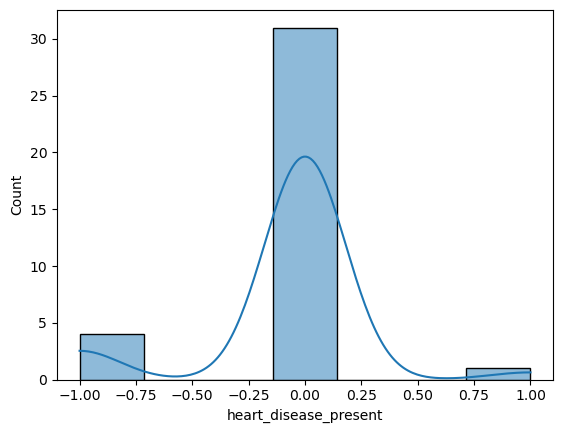

In [165]:
sns.histplot(x = error1,kde=True) # show the error value in plot

- The error term is centered around 0, which means that the model is not systematically over- or under-predicting the outcome.
- The error term has a relatively narrow distribution, which means that the model is making relatively accurate predictions.
- There are few outliers, suggesting that the model is not making any major mistakes.



In [168]:
confusion_matrix(y_test,y_lr) #Generate the confusion matrix for the predictions made by the Logistic Regression model

array([[16,  4],
       [ 1, 15]], dtype=int64)

In [117]:
accuracies = [] # create one empty variable
f1_scores = []  # create second  empty variable
 
for random_state in range(1, 151):
    
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
    
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    
    # Prediction and accuracy calculation
    y_pred = lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    f1 = f1_score(y_test,y_pred,average="weighted")
    
    accuracies.append((random_state, acc))
    f1_scores.append((random_state,f1))

best_random_state = max(accuracies, key=lambda x: x[1])
best_f1_score = max(f1_scores, key = lambda y:y[1])

print(f"Best random_state: {best_random_state[0]}, Accuracy: {best_random_state[1]:.4f}")
print(f"f1_score: {best_f1_score[1]:.4f}")

Best random_state: 114, Accuracy: 0.9722
f1_score: 0.9723


In [175]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1,0.02],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear', 'saga'] ,
    "max_iter": [100,200,500,1000],
    "multi_class" : ["auto","ovr","multinomial"]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.02], 'max_iter': [100, 200, 500, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [177]:
y_hylg = grid_search.predict(x_test) #predictions on the test set

In [179]:
a1=accuracy_score(y_test,y_hylg) #check the model accuracy
a1

0.9166666666666666

In [181]:
y_trhylg = grid_search.predict(x_train)  #predictions on the training set

In [183]:
accuracy_score(y_train,y_trhylg)  #check the model accuracy

0.8541666666666666

## SVM :-Support Vectore Machine

In [317]:
from sklearn.svm import SVC  # import the svc model
sv = SVC() #Create the Support Vector Classifier
sv.fit(x_train,y_train) #Fit the model to the training data

SVC()

In [319]:
y_svm  =sv.predict(x_test) #predictions on the test data

In [321]:
a2=accuracy_score(y_test,y_svm) #check the model accuracy
a2

0.8611111111111112

In [323]:
f2=f1_score(y_test,y_svm)  #check the F1 score
f2

0.8571428571428571

In [194]:
print(classification_report(y_test,y_svm)) #show the classification report for the predictions made by the svm model

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.87      0.81      0.84        16

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



In [137]:
y_svmtr = svm.predict(x_train) #predictions on the training set

In [138]:
accuracy_score(y_train,y_svmtr)  #check the model accuracy

0.9305555555555556

## Decision Tree Algorithm

In [325]:
from sklearn.tree import DecisionTreeClassifier #import the DT model
DT = DecisionTreeClassifier() #call dt model
DT.fit(x_train,y_train) #train the model

DecisionTreeClassifier()

In [327]:
y_dt = DT.predict(x_test) #predictions on the test set 

In [329]:
a3=accuracy_score(y_test,y_dt) #check the model accuracy
a3

0.75

In [331]:
f3=f1_score(y_test,y_dt)  #check the F1 score
f3

0.7567567567567568

In [206]:
print(classification_report(y_test,y_dt)) #show the classification report for the predictions made by the DT model

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.65      0.69      0.67        16

    accuracy                           0.69        36
   macro avg       0.69      0.69      0.69        36
weighted avg       0.70      0.69      0.70        36



In [146]:
accuracies = []
f1_scores = []

for random_state in range(1, 151):
    
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
    
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    
    y_pred = dt.predict(x_test)
    acc3 = accuracy_score(y_test, y_pred)

    f13 = f1_score(y_test,y_pred,average="weighted")
    
    accuracies.append((random_state, acc3))
    f1_scores.append((random_state,f13))


best_random_state = max(accuracies, key=lambda x: x[1])
best_f1_score = max(f1_scores, key = lambda y:y[1])

print(f"Best random_state: {best_random_state[0]}, Accuracy: {best_random_state[1]:.4f}")
print(f"f1_score: {best_f1_score[1]:.4f}")

Best random_state: 22, Accuracy: 0.8056
f1_score: 0.8078


In [147]:
y_trdt = dt.predict(x_train) #predictions on the training set

In [148]:
y_trdt1 = grid_search.predict(x_test) #predictions on the test set using the best model from GridSearchCV

## KNN

In [333]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN model
KNN = KNeighborsClassifier() #call the KNN model
KNN.fit(x_train,y_train)  #train the model

KNeighborsClassifier()

In [335]:
y_knn = KNN.predict(x_test) #predictions on the test set

In [337]:
accuracy_score(y_test,y_knn) #check the model accuracy

0.8055555555555556

In [339]:
f4=f1_score(y_test,y_knn) #check the F1 score
f4

0.7878787878787878

In [216]:
print(classification_report(y_test,y_knn)) #show the classification report for the predictions made by the KNN model

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.69      0.69      0.69        16

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.72      0.72      0.72        36



In [156]:
accuracies = []
f1_scores = []

for random_state in range(1, 151):
    
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
    
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    acc4 = accuracy_score(y_test, y_pred)

    f14 = f1_score(y_test,y_pred,average="weighted")
    
    accuracies.append((random_state, acc4))
    f1_scores.append((random_state,f14))

best_random_state = max(accuracies, key=lambda x: x[1])
best_f1_score = max(f1_scores, key = lambda y:y[1])

print(f"Best random_state: {best_random_state[0]}, Accuracy: {best_random_state[1]:.4f}")
print(f"f1_score: {best_f1_score[1]:.4f}")

Best random_state: 19, Accuracy: 0.9444
f1_score: 0.9446


In [157]:
y_knntr = knn.predict(x_train) #predictions on the training set

In [158]:
accuracy_score(y_train,y_knntr) #check the model accuracy

0.8472222222222222

In [403]:
from sklearn.model_selection import GridSearchCV
# Create a KNN Classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid5 = {
    'n_neighbors': [1,3,9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute'],
    "leaf_size" : [10,30]
}

# Set up GridSearchCV
grid_search5 = GridSearchCV(estimator=knn_classifier, param_grid=param_grid5,
                           scoring='accuracy', cv=8, verbose=1)

# Fit GridSearchCV
grid_search5.fit(x_train, y_train)

Fitting 8 folds for each of 72 candidates, totalling 576 fits


GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [405]:
y_knnhy = grid_search5.predict(x_test) #predictions on the test set using the best model from GridSearchCV

In [407]:
a4=accuracy_score(y_test,y_knnhy)  #check the model accuracy
a4

0.7777777777777778

In [409]:
y_trknnhy = grid_search5.predict(x_train) #predictions on the train set using the best model from GridSearchCV

In [411]:
accuracy_score(y_train,y_trknnhy) #check the model accuracy

0.8263888888888888

## Bagging Algorithm

In [341]:
from sklearn.ensemble import BaggingClassifier # import the BG model
BG = BaggingClassifier() # call BG model
BG.fit(x_train,y_train)   # train the model

BaggingClassifier()

In [343]:
y_bg = BG.predict(x_test)  #predict the test data

In [345]:
a5=accuracy_score(y_test,y_bg)  #check the model accuracy
a5

0.75

In [347]:
f5=f1_score(y_test,y_bg) #check f1 score
f5

0.7272727272727273

In [237]:
print(classification_report(y_test,y_bg)) #show the classification report for the predictions made by the BG model

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.69      0.69      0.69        16

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.72      0.72      0.72        36



In [174]:
accuracies = []
f1_scores = []

for random_state in range(1, 151):
    
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
    
    bg = BaggingClassifier()
    bg.fit(x_train, y_train)

    y_pred = bg.predict(x_test)
    acc5 = accuracy_score(y_test, y_pred)

    f15 = f1_score(y_test,y_pred,average="weighted")
    
    accuracies.append((random_state, acc5))
    f1_scores.append((random_state,f15))

best_random_state = max(accuracies, key=lambda x: x[1])
best_f1_score = max(f1_scores, key = lambda y:y[1])

print(f"Best random_state: {best_random_state[0]}, Accuracy: {best_random_state[1]:.4f}")
print(f"Best random_state: {best_random_state[0]},f1_score: {best_f1_score[1]:.4f}")

Best random_state: 71, Accuracy: 0.8889
Best random_state: 71,f1_score: 0.8889


In [175]:
y_bgtr = bg.predict(x_train) #predictions on the training set 

In [176]:
accuracy_score(y_train,y_bgtr)  #check the model accuracy

0.9861111111111112

In [239]:
from sklearn.model_selection import GridSearchCV
bagging_classifier = BaggingClassifier()

# Define the hyperparameter grid
param_grid6 = {
    'n_estimators': [50,100, 500],  # Number of base estimators
    'max_samples': [0.1, 0.4,],      # Proportion of samples to draw from X
    'max_features': [0.5, 0.7]            # Whether to use bootstrap samples
}

# Set up GridSearchCV
grid_search6 = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid6,
                           scoring='accuracy', cv=5, verbose=1)

# Fit GridSearchCV
grid_search6.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [0.5, 0.7], 'max_samples': [0.1, 0.4],
                         'n_estimators': [50, 100, 500]},
             scoring='accuracy', verbose=1)

In [245]:
y_trhybg = grid_search6.predict(x_train) #predictions on the train set

In [247]:
accuracy_score(y_train,y_trhybg) #check the model accuracy

0.9791666666666666

## RandomForest Algorithm

In [349]:
from sklearn.ensemble import RandomForestClassifier  # import the RM model
RM = RandomForestClassifier() # call RM model
RM.fit(x_train,y_train) # train the model

RandomForestClassifier()

In [350]:
y_rm = RM.predict(x_test)  # predict the test data

In [353]:
a6=accuracy_score(y_test,y_rm) #check the model accuracy
a6

0.8055555555555556

In [355]:
f6=f1_score(y_test,y_rm) #check f1 score
f6

0.8

In [187]:
print(classification_report(y_test,y_rm)) #show the classification report for the predictions made by the RM model

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.93      0.72      0.81        18

    accuracy                           0.83        36
   macro avg       0.85      0.83      0.83        36
weighted avg       0.85      0.83      0.83        36



In [188]:
accuracies = []
f1_scores = []

for random_state in range(1, 151):
    
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
    
    rm = RandomForestClassifier()
    rm.fit(x_train, y_train)
    
    y_pred = rm.predict(x_test)
    acc6 = accuracy_score(y_test, y_pred)

    f16 = f1_score(y_test,y_pred,average="weighted")
    
    accuracies.append((random_state, acc6))
    f1_scores.append((random_state,f16))

best_random_state = max(accuracies, key=lambda x: x[1])
best_f1_score = max(f1_scores, key = lambda y:y[1])

print(f"Best random_state: {best_random_state[0]}, Accuracy: {best_random_state[1]:.4f}")
print(f"Best random_state: {best_random_state[0]},f1_score: {best_f1_score[1]:.4f}")

Best random_state: 11, Accuracy: 0.9167
Best random_state: 11,f1_score: 0.9176


In [189]:
y_rmtr = rm.predict(x_train)  #predictions on the training set 

In [190]:
accuracy_score(y_train,y_rmtr)  #check the model accuracy

1.0

In [191]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=15)

# Define the hyperparameters and the values to search
grid1 = {
    'n_estimators': [100,500],  # Number of trees
    'max_depth': [1,3,5,10],  # Maximum depth of each tree
    'min_samples_split': [0.1,0.5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2,0.4,0.5,0.7]     # Whether bootstrap samples are used
}

# Initialize GridSearchCV with 5-fold cross-validation
gsc = GridSearchCV(estimator=rf, param_grid=grid1, cv=5, n_jobs=-1, verbose=2,scoring="accuracy")

# Fit the model
gsc.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 0.4, 0.5, 0.7],
                         'min_samples_split': [0.1, 0.5],
                         'n_estimators': [100, 500]},
             scoring='accuracy', verbose=2)

In [192]:
yhtrm = gsc.predict(x_test) #predictions on the testing set 

In [193]:
accuracy_score(y_test,yhtrm)  #check the model accuracy

0.7777777777777778

In [194]:
y_trhy = gsc.predict(x_train) #predictions on the train set

In [195]:
accuracy_score(y_train,y_trhy)  #check the model accuracy

0.9722222222222222

## Gradiant Boosting Algorithm

In [357]:
from sklearn.ensemble import GradientBoostingClassifier  # import the gb model
GB = GradientBoostingClassifier() # call GB model
GB.fit(x_train,y_train) # train the model

GradientBoostingClassifier()

In [359]:
y_gb = GB.predict(x_test)  #predict the test data

In [361]:
a7=accuracy_score(y_test,y_gb)  #check model accurasy
a7

0.8333333333333334

In [363]:
f7=f1_score(y_test,y_gb) #check f1 score
f7

0.8333333333333334

In [201]:
print(classification_report(y_test,y_gb)) #show the classification report for the predictions made by the GB model

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.81      0.72      0.76        18

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36



In [202]:
accuracies = []
f1_scores = []

for random_state in range(1, 151):
    
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
    
    gb = GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    
    y_pred = gb.predict(x_test)
    acc7 = accuracy_score(y_test, y_pred)

    f17 = f1_score(y_test,y_pred,average="weighted")
    
    accuracies.append((random_state, acc7))
    f1_scores.append((random_state,f17))

best_random_state = max(accuracies, key=lambda x: x[1])
best_f1_score = max(f1_scores, key = lambda y:y[1])

print(f"Best random_state: {best_random_state[0]}, Accuracy: {best_random_state[1]:.4f}")
print(f"Best random_state: {best_random_state[0]},f1_score: {best_f1_score[1]:.4f}")

Best random_state: 105, Accuracy: 0.8889
Best random_state: 105,f1_score: 0.8907


In [203]:
y_gbtr = gb.predict(x_train)  #predictions on the training set

In [204]:
accuracy_score(y_train,y_gbtr) #check the model accuracy

1.0

In [205]:
gb = GradientBoostingClassifier()

# Define the hyperparameters and ranges to search
param_dist = {
    'n_estimators': [100,500],     # Number of boosting stages
    'learning_rate': [0.1,0.2],        # Step size shrinkage
    'max_depth': [3, 10],                  # Maximum depth of the individual estimators
    'min_samples_split': [1, 5,7],         # Minimum number of samples required to split a node
    'min_samples_leaf': [0.1,0.2],                   # Fraction of samples used for fitting the trees
}

# Initialize RandomizedSearchCV
random_search = GridSearchCV(estimator=gb, param_grid=param_dist,cv=5, n_jobs=-1, verbose=1,scoring="accuracy")

# Fit the model
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 10],
                         'min_samples_leaf': [0.1, 0.2],
                         'min_samples_split': [1, 5, 7],
                         'n_estimators': [100, 500]},
             scoring='accuracy', verbose=1)

In [206]:
y_random_search = random_search.predict(x_test) #predictions on the test set using the best model from RandomizedSearchCV

In [207]:
accuracy_score(y_test,y_random_search)  #check the model accuracy

0.75

In [208]:
y_random_search_tr = random_search.predict(x_train) #predictions on the training set using the best model from RandomizedSearchCV

In [209]:
accuracy_score(y_train,y_random_search_tr) #check the model accuracy

1.0

## Xrtime Gradiant Boosting Algorithm

In [365]:
from xgboost import XGBClassifier # Import the XGB model
XGB = XGBClassifier()  # call XGB model
XGB.fit(x_train,y_train)   # train the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [367]:
y_xgb = XGB.predict(x_test) # predict the test data

In [369]:
accuracy_score(y_test,y_xgb) #check the model accuracy

0.8611111111111112

In [371]:
f8=f1_score(y_test,y_xgb) #check the f1 score
f8

0.8571428571428571

In [215]:
print(classification_report(y_test,y_xgb))  #show the classification report for the predictions made by the xGB model

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.76      0.72      0.74        18

    accuracy                           0.75        36
   macro avg       0.75      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36



In [413]:
from sklearn.model_selection import GridSearchCV
model2 = XGBClassifier()  # Initialize the XGBoost classifier
# Define the parameter grid for GridSearchCV
# This dictionary contains the hyperparameters to be tuned and their possible values
grid = { 
    "n_estimators": [300,500],  # Number of boosting rounds (trees)
    "max_depth": [10, 20], # Maximum depth of the trees
    "max_leaves": [10],   # Maximum number of leaves per tree 
    "learning_rate": [0.1], # Step size shrinkage to prevent overfitting
    "min_child_weight": [5, 10,], # Minimum sum of instance weight needed in a child
    "subsample": [0.6, 0.8],  # Proportion of samples to be used for fitting the individual base learners
    "gamma": [0, 0.1, 0.2] # Minimum loss reduction required to make a further partition
}
gb3 = GridSearchCV(estimator=model2,param_grid=grid,cv = 3,n_jobs=-1,scoring="accuracy",refit=True,verbose=1)
gb3.fit(x_train,y_train) #Fit the model to the training data using GridSearchCV

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2], 'learning_rate': [0.1],
                         'max_depth': [10, 20], 'max_leaves': [10],
                         'min_child_weight': [5, 10],
                         'n_estimators': [300, 500], 'subsample': [0.6, 0.8]},
             scoring='accuracy', verbose=1)

In [415]:
y_hyxgb = XGB.predict(x_test) #predictions on the test set using the trained XGBoost model

In [417]:
a8=accuracy_score(y_test,y_hyxgb) #check the model accuracy
a8

0.9722222222222222

In [219]:
print(classification_report(y_test,y_hyxgb))  #show the classification report for the predictions made by the xGB model

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.76      0.72      0.74        18

    accuracy                           0.75        36
   macro avg       0.75      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36



## ANN:- Artificial Netural Network

In [379]:
from sklearn.neural_network import MLPClassifier # import the ANN model
ANN = MLPClassifier()  # call the Ann  Model
ANN.fit(x_train,y_train) # train the model

MLPClassifier()

In [381]:
y_ann = ANN.predict(x_test) # predict the test data

In [383]:
accuracy_score(y_test,y_ann) #check the model accuracy

0.8055555555555556

In [385]:
f9=f1_score(y_test,y_ann)  #check the f1 score
f9

0.8

In [225]:
print(classification_report(y_test,y_ann))  #show the classification report for the predictions made by the ANN model

              precision    recall  f1-score   support

           0       0.63      0.67      0.65        18
           1       0.65      0.61      0.63        18

    accuracy                           0.64        36
   macro avg       0.64      0.64      0.64        36
weighted avg       0.64      0.64      0.64        36



In [387]:
from sklearn.model_selection import GridSearchCV
model = MLPClassifier() #Initialize the MLP classifier
grid = {
    "hidden_layer_sizes":[100,200,400],
    "activation":["relu"],
    "solver": ["adam"],
    "batch_size":[32],
    "learning_rate_init": [0.1],
    "max_iter" : [100,200]
}
gcv = GridSearchCV(estimator=model,param_grid=grid,cv = 5,scoring="accuracy",n_jobs=-1,verbose=1)
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'batch_size': [32],
                         'hidden_layer_sizes': [100, 200, 400],
                         'learning_rate_init': [0.1], 'max_iter': [100, 200],
                         'solver': ['adam']},
             scoring='accuracy', verbose=1)

In [389]:
y_hyann = ANN.predict(x_test)

In [391]:
accuracy_score(y_test,y_hyann) #check the model accuracy

0.8055555555555556

In [229]:
print(classification_report(y_test,y_hyann))  #show the classification report for the predictions made by the MLP model

              precision    recall  f1-score   support

           0       0.63      0.67      0.65        18
           1       0.65      0.61      0.63        18

    accuracy                           0.64        36
   macro avg       0.64      0.64      0.64        36
weighted avg       0.64      0.64      0.64        36



In [395]:
accuracies = []
f1_scores = []

for random_state in range(1, 151):
    
    # Splitting the data for each random_state
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
    
    # Logistic Regression model
    ann = MLPClassifier()
    ann.fit(x_train, y_train)
    
    # Prediction and accuracy calculation
    y_pred8 = ann.predict(x_test)
    acc8 = accuracy_score(y_test, y_pred8)

    f18 = f1_score(y_test,y_pred8,average="weighted")
    
    # Store accuracy with corresponding random_state
    accuracies.append((random_state, acc8))
    f1_scores.append((random_state,f18))

# Print the best random_state with highest accuracy

best_random_state = max(accuracies, key=lambda x: x[1])
best_f1_score = max(f1_scores, key = lambda y:y[1])

print(f"Best random_state: {best_random_state[0]}, Accuracy: {best_random_state[1]:.4f}")
print(f"Best random_state: {best_random_state[0]},f1_score: {best_f1_score[1]:.4f}")

Best random_state: 58, Accuracy: 0.9167
Best random_state: 58,f1_score: 0.9159


In [397]:
y_anntr = ann.predict(x_train) # predict the train data

In [399]:
a9=accuracy_score(y_train,y_anntr) #check the model accuracy
a9

0.9513888888888888

In [233]:
y_pred8

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [234]:
y_test

120    1
47     0
42     0
161    1
41     0
173    1
59     1
8      1
83     1
139    0
140    1
60     0
13     0
96     1
126    0
18     0
72     0
168    0
159    1
89     0
171    1
149    1
113    1
162    1
66     1
90     0
71     0
164    0
78     1
95     0
70     0
3      1
175    1
99     0
10     0
28     1
Name: heart_disease_present, dtype: int64

In [419]:
# check the all algorithm model perforamnce in table form
# check the Model name, r2_score, mean_squer_error, mean_absolute_error
score = pd.DataFrame({"Model":["LogisticRegression","SVM","DecisionTree","KNN","Bagging","RandomForest","GradiantBoosting","XGB","ANN_MLP"],
                     "accuracy_score":[a1*100,a2*100,a3*100,a4*100,a5*100,a6*100,a7*100,a8*100,a9*100],
                     "f1_score":[f1*100,f2*100,f3*100,f4*100,f5*100,f6*100,f7*100,f8*100,f9*100]})
score

,Model,accuracy_score,f1_score
0,LogisticRegression,91.666667,83.333333
1,SVM,86.111111,85.714286
2,DecisionTree,75.000000,75.675676
3,KNN,77.777778,78.787879
4,Bagging,75.000000,72.727273
5,RandomForest,80.555556,80.000000
6,GradiantBoosting,83.333333,83.333333
7,XGB,97.222222,85.714286
8,ANN_MLP,95.138889,80.000000


## Final Conclusion of Model Report

* I have used total 9 Algorithm like LogisticRegression, SVM, DecisionTree, KNN, Bagging, RandomForest, GradientBoosting, XGB, ANN_MLP.
* Best Performing Model:- The Artificial Neural Network (ANN_MLP) achieved the highest accuracy of 95.14%, indicating superior performance compared to other models in the dataset.
* Moderate Performance:- Models such as Logistic Regression, SVM, KNN, and Bagging show comparable accuracy around 77.78% to 80.56% demonstrating moderate performance. These models can be considered reliable but not as strong as ANN.
* Lowest Performing Models:- Decision Tree performed the worst, with an accuracy of 69.44%, suggesting that this model may not generalize well for the task at hand.
* Potential for Improvement:- Gradient Boosting, XGBoost, and Random Forest, with scores around 75.00%, may benefit from further hyperparameter tuning or additional feature engineering to enhance their performance.
* ANN_MLP stands out as the most effective model in this dataset with others showing moderate to low performance.

## Final Challenges of Report
**Missing or Incomplete Data:**
Some columns like num_major_vessels or thal could have missing values, which can affect model training unless handled properly (e.g., with imputation techniques).\
**Feature Scaling:**
Variables like age, serum_cholesterol_mg_per_dl, and max_heart_rate_achieved exist on different scales. Failing to normalize or standardize these features can impact model performance, especially in distance-based algorithms like KNN or SVM.\
**Outliers:** Columns like resting_blood_pressure or oldpeak_eq_st_depression could contain outliers that skew the model’s learning. Identifying and handling outliers is essential to avoid poor performance.\
**Feature Interaction:**
The interaction between variables such as max_heart_rate_achieved, age, and chest_pain_type may play an important role. Identifying and capturing these interactions for model improvement can be tricky.\
**Model Selection and Tuning:** Deciding on the right machine learning algorithm (Logistic Regression, SVM, ANN, etc.) and optimizing hyperparameters for better performance can be time-consuming and may require multiple trials.\

## Model Save

In [425]:
import pickle #Importing the pickle module
with open("Heart.pkl","wb") as f: #Open the file "Heart.pkl" in write-binary mode
    pickle.dump(ann,f) #save it to the file

In [427]:
with open("Heart.pkl","rb") as f: # Open the file "Heart.pkl" in read-binary mode
    file = pickle.load(f) #load the file

In [429]:
file #call file

MLPClassifier()

In [431]:
x1.head() #show the top 5 row 

,principle_components 1,principle_components 2,principle_components 3,principle_components 4,principle_components 5,principle_components 6,principle_components 7,principle_components 8,principle_components 9,principle_components 10,principle_components 11,principle_components 12,principle_components 13
0,1.085544,1.117843,-0.388637,-0.891921,-0.444806,1.166045,-0.729907,0.590027,-0.455115,-0.386198,0.759796,0.021934,-0.694278
1,-0.693972,0.346811,-1.089153,0.683107,0.354086,0.368060,1.403343,-0.661170,1.517995,0.570473,-0.623202,0.145816,0.002533
2,1.039957,0.494007,-0.286503,2.991035,0.347528,-1.557912,-1.617112,0.632903,-0.667562,-0.388091,-0.261791,1.883757,-2.251530
3,-0.510076,1.416759,1.286407,-1.487697,-0.591344,-1.528983,0.073995,-0.819625,-0.483857,-0.040207,0.419247,-1.657323,0.026610
4,0.446433,-0.277388,2.661706,-0.681096,1.855713,2.774957,1.231892,0.467711,-0.812546,0.206884,0.239351,-1.872585,-0.595162


In [433]:
y1.head() #show the top 5 data

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

In [435]:
#predict the new data
file.predict([[1.085544	,1.117843 ,	-0.388637, -0.891921, -0.444806 , 	1.166045 ,	-0.729907 ,	0.590027 ,	-0.455115 ,	-0.386198 ,	0.759796 ,	0.021934 ,	-0.694278]])

array([0], dtype=int64)

In [246]:
pwd

'C:\\Users\\Admin\\Downloads\\Datamites\\Internship project\\Data'